# Variations

In [1]:
import itertools
from random import random
import json

# Define all variation parameters - EXTENDED WITH PHYSIOGNOMY
# ============================================================================
# IMPROVED VERSION: Addressing customer feedback
# (1) More diverse face geometry - wider range of face shapes and proportions
# (2) Reduced left-right symmetry - more natural asymmetry options
# (3) More natural skin and hair textures - less "AI perfect" appearance
# ============================================================================

variations = {
    'gender': [
        'boy',
        'girl'
    ],
    
    # ========== FACE SHAPE (Expanded for diversity) ==========
    'face_shape': {
        'boy': [
            'round face', 'square face', 'oval face', 'heart-shaped face',
            'rectangular face', 'oblong face', 'diamond face', 'triangular face',
            'wide face', 'narrow face', 'angular face'
        ],
        'girl': [
            'oval face', 'round face', 'heart-shaped face', 'diamond face',
            'oblong face', 'pear-shaped face', 'square face', 'inverted triangle face',
            'wide face', 'narrow face', 'delicate angular face'
        ]
    },
    
    # ========== SKIN TONE (Expanded with texture variations) ==========
    'skin_tone': [
        'fair skin',
        'light skin',
        'warm beige skin',
        'light tan skin',
        'olive skin',
        'pale ivory skin',
        'rosy complexion',
        'golden undertone skin',
        'peachy skin tone',
        'cream colored skin'
    ],
    
    # ========== SKIN TEXTURE (NEW - addresses AI-perfect skin issue) ==========
    'skin_texture': [
        'natural skin with subtle pores',
        'slightly uneven skin texture',
        'natural freckles on cheeks',
        'faint moles',
        'natural rosy patches on cheeks',
        'slightly dry skin patches',
        'natural skin imperfections',
        'sun-kissed with light spots',
        'baby-soft skin with natural variations',
        'realistic skin with fine texture'
    ],
    
    # ========== EYES (Eye Region Details) ==========
    'eye_shape': [
        'almond eyes',
        'monolid eyes',
        'slightly hooded eyes',
        'upturned eyes',
        'narrow eyes',
        'round eyes',
        'deep-set eyes',
        'prominent eyes',
        'tapered eyes',
        'droopy eyes'
    ],
    'eye_spacing': [
        'normal eye spacing',
        'close-set eyes',
        'wide-set eyes',
        'slightly asymmetric eye spacing'  # NEW: Asymmetry
    ],
    'eye_size': [
        'medium eyes',
        'small eyes',
        'large expressive eyes',
        'one eye slightly larger than other'  # NEW: Asymmetry
    ],
    
    # ========== EYE ASYMMETRY (NEW - addresses symmetry issue) ==========
    'eye_asymmetry': [
        'symmetric eyes',
        'left eye slightly higher',
        'right eye slightly higher',
        'left eye slightly larger',
        'right eye slightly larger',
        'slight eyelid crease difference',
        'one eye more hooded than other',
        'natural eye asymmetry'
    ],
    
    # ========== EYEBROWS (Lông mày - with asymmetry) ==========
    'eyebrow_shape': {
        'boy': [
            'straight eyebrows', 'slightly arched eyebrows', 'natural eyebrows', 
            'angular eyebrows', 'bushy eyebrows', 'sparse eyebrows', 'uneven eyebrows'
        ],
        'girl': [
            'soft arched eyebrows', 'straight eyebrows', 'gently curved eyebrows', 
            'natural eyebrows', 'thin delicate eyebrows', 'full eyebrows', 'slightly uneven eyebrows'
        ]
    },
    'eyebrow_thickness': [
        'thin eyebrows',
        'medium eyebrows',
        'thick eyebrows',
        'uneven thickness eyebrows',
        'naturally sparse eyebrows'
    ],
    'eyebrow_asymmetry': [
        'symmetric eyebrows',
        'left eyebrow slightly higher',
        'right eyebrow slightly higher',
        'one eyebrow slightly thicker',
        'natural eyebrow asymmetry'
    ],
    
    # ========== NOSE (Mũi - with asymmetry) ==========
    'nose_type': [
        'small nose',
        'low bridge nose',
        'button nose',
        'narrow nose',
        'petite nose',
        'broad nose',
        'flat nose',
        'pointed nose',
        'snub nose',
        'aquiline nose'
    ],
    'nose_bridge': [
        'low nose bridge',
        'medium nose bridge',
        'straight nose bridge',
        'curved nose bridge',
        'bumpy nose bridge',
        'slightly crooked bridge'  # NEW: Asymmetry
    ],
    'nostril_shape': [
        'small nostrils',
        'narrow nostrils',
        'round nostrils',
        'flared nostrils',
        'slightly asymmetric nostrils'  # NEW: Asymmetry
    ],
    
    # ========== MOUTH & LIPS (Miệng & Môi - with asymmetry) ==========
    'mouth_feature': {
        'boy': [
            'thin lips', 'small lips', 'narrow mouth', 'straight lips',
            'wide mouth', 'pursed lips', 'relaxed lips'
        ],
        'girl': [
            'small lips', 'delicate lips', 'soft lips', 'cupid bow lips',
            'pouty lips', 'natural lips', 'heart-shaped lips'
        ]
    },
    'mouth_width': [
        'narrow mouth',
        'medium mouth',
        'wide mouth',
        'slightly asymmetric mouth'  # NEW: Asymmetry
    ],
    'lip_fullness': [
        'thin lips',
        'medium lips',
        'full lips',
        'uneven lips with fuller lower lip',
        'uneven lips with fuller upper lip'
    ],
    'mouth_asymmetry': [
        'symmetric mouth',
        'left corner slightly higher',
        'right corner slightly higher',
        'natural smile asymmetry',
        'slight lip asymmetry'
    ],
    
    # ========== CHEEKS (Má - with asymmetry) ==========
    'cheek_fullness': [
        'full round cheeks',
        'soft cheeks',
        'defined cheekbones',
        'flat cheeks',
        'high cheekbones',
        'low cheekbones',
        'slightly hollow cheeks',
        'plump cheeks'
    ],
    'cheek_asymmetry': [
        'symmetric cheeks',
        'left cheek slightly fuller',
        'right cheek slightly fuller',
        'natural cheek asymmetry'
    ],
    
    # ========== CHIN (Cằm - with asymmetry) ==========
    'chin_shape': [
        'rounded chin',
        'pointed chin',
        'soft chin',
        'small chin',
        'wide chin',
        'cleft chin',
        'receding chin',
        'prominent chin'
    ],
    'chin_prominence': [
        'subtle chin',
        'moderate chin',
        'prominent chin',
        'weak chin',
        'strong chin'
    ],
    
    # ========== FOREHEAD (Trán - with asymmetry) ==========
    'forehead_height': [
        'average forehead',
        'high forehead',
        'low forehead',
        'very high forehead',
        'short forehead'
    ],
    'forehead_width': [
        'narrow forehead',
        'average forehead',
        'broad forehead',
        'wide temples'
    ],
    
    # ========== EARS (Tai - with asymmetry) ==========
    'ear_size': [
        'small ears',
        'medium ears',
        'large ears',
        'asymmetric ear sizes'  # NEW: Asymmetry
    ],
    'ear_position': [
        'normal ear position',
        'slightly protruding ears',
        'close to head ears',
        'one ear more protruding',  # NEW: Asymmetry
        'ears at different heights'  # NEW: Asymmetry
    ],
    
    # ========== JAW (Hàm - with asymmetry) ==========
    'jawline': {
        'boy': [
            'soft jawline', 'rounded jawline', 'defined jawline',
            'angular jawline', 'square jawline', 'slight jaw asymmetry'
        ],
        'girl': [
            'delicate jawline', 'soft rounded jawline', 'gentle jawline',
            'V-shaped jawline', 'subtle jawline', 'natural jaw asymmetry'
        ]
    },
    
    # ========== FACE PROPORTIONS (Tỷ lệ khuôn mặt - MORE VARIETY) ==========
    'face_proportion': [
        'balanced proportions',
        'slightly elongated face',
        'slightly compact face',
        'long face with short forehead',
        'short face with high forehead',
        'wide middle face',
        'narrow lower face',
        'unique proportions'
    ],
    
    # ========== FACIAL SYMMETRY (Explicit asymmetry options) ==========
    'facial_symmetry': [
        'symmetrical face',
        'naturally asymmetrical face',
        'slight left-side dominance',
        'slight right-side dominance',
        'noticeable natural asymmetry',
        'subtle facial asymmetry',
        'realistic asymmetric features'
    ],
    
    # ========== HAIR STYLE (Expanded with messy/natural options) ==========
    'hair_style': {
        'boy': [
            'short straight hair', 'short spiky hair', 'bowl cut hair', 'crew cut hair',
            'messy tousled hair', 'bedhead hair', 'windswept hair', 'uneven haircut',
            'cowlick sticking up', 'natural uncombed hair', 'slightly overgrown hair'
        ],
        'girl': [
            'long straight hair', 'shoulder-length hair', 'hair with bangs', 'bob cut hair', 
            'ponytail hair', 'messy loose hair', 'windswept tangled hair', 'flyaway hair',
            'uneven bangs', 'natural frizzy hair', 'hair with stray strands', 'bedhead waves'
        ]
    },
    
    # ========== HAIR TEXTURE (Expanded - more natural/imperfect) ==========
    'hair_texture': [
        'straight hair',
        'slightly wavy hair',
        'fine hair',
        'thick hair',
        'frizzy hair',
        'coarse hair',
        'silky hair',
        'dry textured hair',
        'naturally tangled hair',
        'wispy hair',
        'flyaway static hair'
    ],
    
    # ========== HAIR VOLUME (Expanded) ==========
    'hair_volume': [
        'normal volume hair',
        'thin hair',
        'thick voluminous hair',
        'flat hair',
        'puffy hair',
        'uneven volume hair',
        'natural cowlicks',
        'hair sticking out'
    ],
    
    # ========== HAIR IMPERFECTIONS (NEW - addresses too-neat hair issue) ==========
    'hair_imperfection': [
        'perfectly styled',
        'slightly messy',
        'windblown look',
        'a few stray hairs',
        'natural flyaways',
        'slight bedhead',
        'minor tangles',
        'hair falling in face',
        'one side more tousled',
        'natural imperfect styling'
    ],
    
    # ========== EXPRESSION & CONDITIONS (Stage 2) ==========
    'expression': [
        'neutral',
        'gentle smile',
        'serious',
        'curious',
        'thinking',
        'shy smile',
        'cheerful',
        'concentrating',
        'slightly asymmetric smile',  # NEW: Asymmetric expression
        'one-sided smirk',
        'natural relaxed expression'
    ],
    'angle': [
        'frontal',
        '45-degree',
        'profile',
        'slight up',
        'slight down',
        'three-quarter',
        'slightly tilted head'  # NEW: More natural angles
    ],
    'lighting': [
        'soft light',
        'natural light',
        'even light',
        'side light',
        'diffused light',
        'natural uneven lighting',  # NEW: More realistic lighting
        'slight shadows on one side'
    ]
}

# ============================================================================
# SUMMARY OF IMPROVEMENTS:
# ============================================================================
# (1) Face geometry diversity:
#     - Expanded face_shape options (11 types per gender vs 4)
#     - Added more face_proportion variations (8 vs 3)
#     - More nose, chin, cheek options
#
# (2) Reduced symmetry (natural asymmetry):
#     - Added eye_asymmetry, eyebrow_asymmetry, mouth_asymmetry, cheek_asymmetry
#     - Asymmetric options in eye_spacing, nostril_shape, ear_position, jawline
#     - More facial_symmetry options emphasizing natural asymmetry
#
# (3) More natural skin and hair:
#     - Added skin_texture with natural imperfections (freckles, pores, patches)
#     - Expanded hair_style with messy/natural options
#     - Added hair_imperfection for realistic styling
#     - More hair_texture and hair_volume variations
# ============================================================================

print("✓ Improved variations loaded")
print(f"  Face shapes: {len(variations['face_shape']['boy'])} (boy), {len(variations['face_shape']['girl'])} (girl)")
print(f"  Skin tones: {len(variations['skin_tone'])}")
print(f"  Skin textures: {len(variations['skin_texture'])} (NEW)")
print(f"  Eye asymmetry options: {len(variations['eye_asymmetry'])} (NEW)")
print(f"  Hair imperfections: {len(variations['hair_imperfection'])} (NEW)")
print(f"  Facial symmetry options: {len(variations['facial_symmetry'])}")

✓ Improved variations loaded
  Face shapes: 11 (boy), 11 (girl)
  Skin tones: 10
  Skin textures: 10 (NEW)
  Eye asymmetry options: 8 (NEW)
  Hair imperfections: 10 (NEW)
  Facial symmetry options: 7


In [2]:
variations.keys()

dict_keys(['gender', 'face_shape', 'skin_tone', 'skin_texture', 'eye_shape', 'eye_spacing', 'eye_size', 'eye_asymmetry', 'eyebrow_shape', 'eyebrow_thickness', 'eyebrow_asymmetry', 'nose_type', 'nose_bridge', 'nostril_shape', 'mouth_feature', 'mouth_width', 'lip_fullness', 'mouth_asymmetry', 'cheek_fullness', 'cheek_asymmetry', 'chin_shape', 'chin_prominence', 'forehead_height', 'forehead_width', 'ear_size', 'ear_position', 'jawline', 'face_proportion', 'facial_symmetry', 'hair_style', 'hair_texture', 'hair_volume', 'hair_imperfection', 'expression', 'angle', 'lighting'])

# STAGE 1: Base Face Generation Prompt Templates (Multiple Variations)

In [2]:
# ============================================================================
# IMPROVED PROMPT TEMPLATES
# Addressing customer feedback:
# (1) More diverse face geometry
# (2) Reduced left-right symmetry  
# (3) More natural skin and hair textures
# ============================================================================

# Template 1: Structured by facial regions (IMPROVED)
def create_stage1_prompt_v1(
    character_id: int,
    gender: str,
    face_shape: str, skin_tone: str, skin_texture: str,
    eye_shape: str, eye_spacing: str, eye_size: str, eye_asymmetry: str,
    eyebrow_shape: str, eyebrow_thickness: str, eyebrow_asymmetry: str,
    nose_type: str, nose_bridge: str, nostril_shape: str,
    mouth_feature: str, mouth_width: str, lip_fullness: str, mouth_asymmetry: str,
    cheek_fullness: str, cheek_asymmetry: str,
    chin_shape: str, chin_prominence: str,
    forehead_height: str, forehead_width: str,
    ear_size: str, ear_position: str,
    jawline: str, face_proportion: str, facial_symmetry: str,
    hair_style: str, hair_texture: str, hair_volume: str, hair_imperfection: str,
    age_range: str = "8-10 years old"
) -> str:
    """Template 1: Structured by facial regions (IMPROVED with asymmetry and textures)"""
    return f"""A Japanese child with {gender} {age_range}, ID#{character_id}. 
FACE STRUCTURE: {face_shape}, {skin_tone}, {skin_texture}, {face_proportion}, {facial_symmetry}.
EYES: {eye_shape}, {eye_spacing}, {eye_size}, {eye_asymmetry}.
EYEBROWS: {eyebrow_shape}, {eyebrow_thickness}, {eyebrow_asymmetry}.
NOSE: {nose_type}, {nose_bridge}, {nostril_shape}.
MOUTH: {mouth_feature}, {mouth_width}, {lip_fullness}, {mouth_asymmetry}.
CHEEKS: {cheek_fullness}, {cheek_asymmetry}.
CHIN: {chin_shape}, {chin_prominence}.
FOREHEAD: {forehead_height}, {forehead_width}.
EARS: {ear_size}, {ear_position}.
JAW: {jawline}.
HAIR: {hair_style}, {hair_texture}, {hair_volume}, {hair_imperfection}.
Neutral expression, frontal view, natural lighting with subtle variations. Realistic skin texture with natural imperfections, sharp focus, plain background."""


# Template 2: Natural description style (IMPROVED)
def create_stage1_prompt_v2(
    character_id: int,
    gender: str,
    face_shape: str, skin_tone: str, skin_texture: str,
    eye_shape: str, eye_spacing: str, eye_size: str, eye_asymmetry: str,
    eyebrow_shape: str, eyebrow_thickness: str, eyebrow_asymmetry: str,
    nose_type: str, nose_bridge: str, nostril_shape: str,
    mouth_feature: str, mouth_width: str, lip_fullness: str, mouth_asymmetry: str,
    cheek_fullness: str, cheek_asymmetry: str,
    chin_shape: str, chin_prominence: str,
    forehead_height: str, forehead_width: str,
    ear_size: str, ear_position: str,
    jawline: str, face_proportion: str, facial_symmetry: str,
    hair_style: str, hair_texture: str, hair_volume: str, hair_imperfection: str,
    age_range: str = "8-10 years old"
) -> str:
    """Template 2: Natural flowing description (IMPROVED)"""
    return f"""Portrait of a Japanese {gender} child, {age_range}, Character#{character_id}.
This child has a {face_shape} with {skin_tone} and {skin_texture}. The face shows {face_proportion} with {facial_symmetry}.
The eyes are {eye_shape} with {eye_spacing}, {eye_size}, and {eye_asymmetry}. Above them sit {eyebrow_shape} that are {eyebrow_thickness} with {eyebrow_asymmetry}.
A {nose_type} with {nose_bridge} and {nostril_shape} centers the face.
The mouth features {mouth_feature} with {mouth_width}, {lip_fullness}, and {mouth_asymmetry}.
{cheek_fullness} with {cheek_asymmetry} frame the face, leading to a {chin_shape} with {chin_prominence}.
The {forehead_height} and {forehead_width} complete the upper face. {ear_size} with {ear_position} are visible.
A {jawline} defines the lower face. Hair is {hair_style}, {hair_texture}, with {hair_volume} and {hair_imperfection}.
Neutral expression, frontal view, soft natural lighting with realistic variations, plain background, photorealistic with natural imperfections."""


# Template 3: Compact keyword style (IMPROVED)
def create_stage1_prompt_v3(
    character_id: int,
    gender: str,
    face_shape: str, skin_tone: str, skin_texture: str,
    eye_shape: str, eye_spacing: str, eye_size: str, eye_asymmetry: str,
    eyebrow_shape: str, eyebrow_thickness: str, eyebrow_asymmetry: str,
    nose_type: str, nose_bridge: str, nostril_shape: str,
    mouth_feature: str, mouth_width: str, lip_fullness: str, mouth_asymmetry: str,
    cheek_fullness: str, cheek_asymmetry: str,
    chin_shape: str, chin_prominence: str,
    forehead_height: str, forehead_width: str,
    ear_size: str, ear_position: str,
    jawline: str, face_proportion: str, facial_symmetry: str,
    hair_style: str, hair_texture: str, hair_volume: str, hair_imperfection: str,
    age_range: str = "8-10 years old"
) -> str:
    """Template 3: Compact comma-separated keywords (IMPROVED)"""
    return f"""Japanese {gender} child portrait, {age_range}, ID:{character_id}, {face_shape}, {skin_tone}, {skin_texture}, {face_proportion}, {facial_symmetry}, {eye_shape}, {eye_spacing}, {eye_size}, {eye_asymmetry}, {eyebrow_shape}, {eyebrow_thickness}, {eyebrow_asymmetry}, {nose_type}, {nose_bridge}, {nostril_shape}, {mouth_feature}, {mouth_width}, {lip_fullness}, {mouth_asymmetry}, {cheek_fullness}, {cheek_asymmetry}, {chin_shape}, {chin_prominence}, {forehead_height}, {forehead_width}, {ear_size}, {ear_position}, {jawline}, {hair_style}, {hair_texture}, {hair_volume}, {hair_imperfection}, neutral expression, frontal view, natural lighting, sharp focus, realistic skin texture, plain background, high quality portrait with natural imperfections"""


# Template 4: Hierarchical importance style (IMPROVED)
def create_stage1_prompt_v4(
    character_id: int,
    gender: str,
    face_shape: str, skin_tone: str, skin_texture: str,
    eye_shape: str, eye_spacing: str, eye_size: str, eye_asymmetry: str,
    eyebrow_shape: str, eyebrow_thickness: str, eyebrow_asymmetry: str,
    nose_type: str, nose_bridge: str, nostril_shape: str,
    mouth_feature: str, mouth_width: str, lip_fullness: str, mouth_asymmetry: str,
    cheek_fullness: str, cheek_asymmetry: str,
    chin_shape: str, chin_prominence: str,
    forehead_height: str, forehead_width: str,
    ear_size: str, ear_position: str,
    jawline: str, face_proportion: str, facial_symmetry: str,
    hair_style: str, hair_texture: str, hair_volume: str, hair_imperfection: str,
    age_range: str = "8-10 years old"
) -> str:
    """Template 4: Hierarchical with primary/secondary features (IMPROVED)"""
    return f"""[Subject] Japanese {gender} child, {age_range}, unique ID#{character_id}
[Primary Features] {face_shape}, {skin_tone}, {skin_texture}, {eye_shape} with {eye_size}, {nose_type}, {mouth_feature}
[Secondary Features] {eye_spacing}, {eye_asymmetry}, {eyebrow_shape}, {eyebrow_thickness}, {eyebrow_asymmetry}, {nose_bridge}, {nostril_shape}, {mouth_width}, {lip_fullness}, {mouth_asymmetry}
[Face Details] {cheek_fullness}, {cheek_asymmetry}, {chin_shape}, {chin_prominence}, {forehead_height}, {forehead_width}, {jawline}
[Proportions & Symmetry] {face_proportion}, {facial_symmetry}
[Ears] {ear_size}, {ear_position}
[Hair] {hair_style}, {hair_texture}, {hair_volume}, {hair_imperfection}
[Conditions] neutral expression, frontal view, natural lighting with subtle shadows, sharp focus, realistic skin with natural imperfections, plain background"""


# Template 5: Photography style prompt (IMPROVED)
def create_stage1_prompt_v5(
    character_id: int,
    gender: str,
    face_shape: str, skin_tone: str, skin_texture: str,
    eye_shape: str, eye_spacing: str, eye_size: str, eye_asymmetry: str,
    eyebrow_shape: str, eyebrow_thickness: str, eyebrow_asymmetry: str,
    nose_type: str, nose_bridge: str, nostril_shape: str,
    mouth_feature: str, mouth_width: str, lip_fullness: str, mouth_asymmetry: str,
    cheek_fullness: str, cheek_asymmetry: str,
    chin_shape: str, chin_prominence: str,
    forehead_height: str, forehead_width: str,
    ear_size: str, ear_position: str,
    jawline: str, face_proportion: str, facial_symmetry: str,
    hair_style: str, hair_texture: str, hair_volume: str, hair_imperfection: str,
    age_range: str = "8-10 years old"
) -> str:
    """Template 5: Professional photography style (IMPROVED)"""
    return f"""Professional headshot photograph of Japanese {gender} child, {age_range}.
Model ID: {character_id}. Face characteristics: {face_shape}, {skin_tone}, {skin_texture}, {face_proportion} with {facial_symmetry}.
Eye region: {eye_shape}, {eye_spacing}, {eye_size}, {eye_asymmetry}. Brows: {eyebrow_shape}, {eyebrow_thickness}, {eyebrow_asymmetry}.
Nose: {nose_type}, {nose_bridge}, {nostril_shape}. Lips: {mouth_feature}, {mouth_width}, {lip_fullness}, {mouth_asymmetry}.
Cheeks: {cheek_fullness}, {cheek_asymmetry}. Chin: {chin_shape}, {chin_prominence}. Forehead: {forehead_height}, {forehead_width}.
Ears: {ear_size}, {ear_position}. Jaw: {jawline}. Hairstyle: {hair_style}, {hair_texture}, {hair_volume}, {hair_imperfection}.
Studio lighting with natural shadows, neutral expression, frontal pose, 85mm lens, f/2.8, clean backdrop, realistic skin detail with natural pores and texture preserved."""


# Template 6: Attribute list style (IMPROVED)
def create_stage1_prompt_v6(
    character_id: int,
    gender: str,
    face_shape: str, skin_tone: str, skin_texture: str,
    eye_shape: str, eye_spacing: str, eye_size: str, eye_asymmetry: str,
    eyebrow_shape: str, eyebrow_thickness: str, eyebrow_asymmetry: str,
    nose_type: str, nose_bridge: str, nostril_shape: str,
    mouth_feature: str, mouth_width: str, lip_fullness: str, mouth_asymmetry: str,
    cheek_fullness: str, cheek_asymmetry: str,
    chin_shape: str, chin_prominence: str,
    forehead_height: str, forehead_width: str,
    ear_size: str, ear_position: str,
    jawline: str, face_proportion: str, facial_symmetry: str,
    hair_style: str, hair_texture: str, hair_volume: str, hair_imperfection: str,
    age_range: str = "8-10 years old"
) -> str:
    """Template 6: Explicit attribute list (IMPROVED)"""
    return f"""Generate face portrait:
- Subject: Japanese {gender} child ({age_range}), ID={character_id}
- Face shape: {face_shape} | Skin: {skin_tone}, {skin_texture} | Proportions: {face_proportion} | Symmetry: {facial_symmetry}
- Eyes: {eye_shape}, {eye_spacing}, {eye_size}, {eye_asymmetry}
- Eyebrows: {eyebrow_shape}, {eyebrow_thickness}, {eyebrow_asymmetry}
- Nose: {nose_type}, {nose_bridge}, {nostril_shape}
- Mouth: {mouth_feature}, {mouth_width}, {lip_fullness}, {mouth_asymmetry}
- Cheeks: {cheek_fullness}, {cheek_asymmetry} | Chin: {chin_shape}, {chin_prominence}
- Forehead: {forehead_height}, {forehead_width} | Ears: {ear_size}, {ear_position}
- Jawline: {jawline}
- Hair: {hair_style}, {hair_texture}, {hair_volume}, {hair_imperfection}
- Expression: neutral | Angle: frontal | Lighting: natural with subtle variations
- Quality: high resolution, sharp focus, realistic natural skin texture with imperfections, plain background"""


# Master function to select template
def create_stage1_base_face_prompt(
    character_id: int,
    gender: str,
    face_shape: str, skin_tone: str, skin_texture: str,
    eye_shape: str, eye_spacing: str, eye_size: str, eye_asymmetry: str,
    eyebrow_shape: str, eyebrow_thickness: str, eyebrow_asymmetry: str,
    nose_type: str, nose_bridge: str, nostril_shape: str,
    mouth_feature: str, mouth_width: str, lip_fullness: str, mouth_asymmetry: str,
    cheek_fullness: str, cheek_asymmetry: str,
    chin_shape: str, chin_prominence: str,
    forehead_height: str, forehead_width: str,
    ear_size: str, ear_position: str,
    jawline: str, face_proportion: str, facial_symmetry: str,
    hair_style: str, hair_texture: str, hair_volume: str, hair_imperfection: str,
    age_range: str = "8-10 years old",
    template_version: int = 1
) -> str:
    """
    Master function to generate Stage 1 prompt using different templates.
    
    IMPROVED VERSION with:
    - skin_texture: Natural skin imperfections
    - eye_asymmetry, eyebrow_asymmetry, mouth_asymmetry, cheek_asymmetry: Natural asymmetry
    - hair_imperfection: Natural messy/realistic hair
    
    Args:
        template_version: 1-6, selects which prompt template to use
    """
    templates = {
        1: create_stage1_prompt_v1,
        2: create_stage1_prompt_v2,
        3: create_stage1_prompt_v3,
        4: create_stage1_prompt_v4,
        5: create_stage1_prompt_v5,
        6: create_stage1_prompt_v6,
    }
    
    template_func = templates.get(template_version, create_stage1_prompt_v1)
    
    return template_func(
        character_id=character_id,
        gender=gender,
        face_shape=face_shape, skin_tone=skin_tone, skin_texture=skin_texture,
        eye_shape=eye_shape, eye_spacing=eye_spacing, eye_size=eye_size, eye_asymmetry=eye_asymmetry,
        eyebrow_shape=eyebrow_shape, eyebrow_thickness=eyebrow_thickness, eyebrow_asymmetry=eyebrow_asymmetry,
        nose_type=nose_type, nose_bridge=nose_bridge, nostril_shape=nostril_shape,
        mouth_feature=mouth_feature, mouth_width=mouth_width, lip_fullness=lip_fullness, mouth_asymmetry=mouth_asymmetry,
        cheek_fullness=cheek_fullness, cheek_asymmetry=cheek_asymmetry,
        chin_shape=chin_shape, chin_prominence=chin_prominence,
        forehead_height=forehead_height, forehead_width=forehead_width,
        ear_size=ear_size, ear_position=ear_position,
        jawline=jawline, face_proportion=face_proportion, facial_symmetry=facial_symmetry,
        hair_style=hair_style, hair_texture=hair_texture, hair_volume=hair_volume, hair_imperfection=hair_imperfection,
        age_range=age_range
    )

print("✓ Improved prompt templates loaded (6 versions)")
print("  NEW features: skin_texture, eye_asymmetry, eyebrow_asymmetry,")
print("                mouth_asymmetry, cheek_asymmetry, hair_imperfection")

✓ Improved prompt templates loaded (6 versions)
  NEW features: skin_texture, eye_asymmetry, eyebrow_asymmetry,
                mouth_asymmetry, cheek_asymmetry, hair_imperfection


# STAGE 2: Variation Generation Prompt (Conditions)


# SECTION: Regenerate Prompts from Old Prompts (Same ID)

This section allows you to:
1. Load existing prompts from `selected_1000_ids/prompts.csv`
2. Parse the original facial features from the prompts
3. Add improved attributes (asymmetry, skin texture, hair imperfection)
4. Generate new prompts with same ID to compare changes

**Purpose**: Test if Google's model lacks distribution of Japanese data by comparing old vs new prompts with same ID.

In [6]:
import pandas as pd
import re
import random
from pathlib import Path
import json

def parse_prompt_features(prompt: str) -> dict:
    """
    Parse facial features from an existing prompt.
    Handles different template formats (t1, t2, t3, t4, t5, t6).
    
    Returns:
        dict: Dictionary of parsed features
    """
    features = {}
    
    # Try to extract character ID
    id_match = re.search(r'ID[#:]?(\d+)|Character#(\d+)|unique ID#(\d+)|ID=(\d+)', prompt)
    if id_match:
        for g in id_match.groups():
            if g:
                features['character_id'] = int(g)
                break
    
    # Detect gender
    if 'boy' in prompt.lower():
        features['gender'] = 'boy'
    elif 'girl' in prompt.lower():
        features['gender'] = 'girl'
    else:
        features['gender'] = 'boy'  # default
    
    # Common patterns to extract
    patterns = {
        'face_shape': r'(round face|square face|oval face|heart-shaped face|rectangular face|oblong face|diamond face|triangular face|wide face|narrow face|angular face|delicate angular face|pear-shaped face|inverted triangle face)',
        'skin_tone': r'(fair skin|light skin|warm beige skin|light tan skin|olive skin|pale ivory skin|rosy complexion|golden undertone skin|peachy skin tone|cream colored skin)',
        'eye_shape': r'(almond eyes|monolid eyes|slightly hooded eyes|upturned eyes|narrow eyes|round eyes|deep-set eyes|prominent eyes|tapered eyes|droopy eyes)',
        'eye_spacing': r'(normal eye spacing|close-set eyes|wide-set eyes|slightly asymmetric eye spacing)',
        'eye_size': r'(medium eyes|small eyes|large expressive eyes|one eye slightly larger than other)',
        'eyebrow_shape': r'(straight eyebrows|slightly arched eyebrows|natural eyebrows|angular eyebrows|bushy eyebrows|sparse eyebrows|uneven eyebrows|soft arched eyebrows|gently curved eyebrows|thin delicate eyebrows|full eyebrows|slightly uneven eyebrows)',
        'eyebrow_thickness': r'(thin eyebrows|medium eyebrows|thick eyebrows|uneven thickness eyebrows|naturally sparse eyebrows)',
        'nose_type': r'(small nose|low bridge nose|button nose|narrow nose|petite nose|broad nose|flat nose|pointed nose|snub nose|aquiline nose)',
        'nose_bridge': r'(low nose bridge|medium nose bridge|straight nose bridge|curved nose bridge|bumpy nose bridge|slightly crooked bridge)',
        'nostril_shape': r'(small nostrils|narrow nostrils|round nostrils|flared nostrils|slightly asymmetric nostrils)',
        'mouth_feature': r'(thin lips|small lips|narrow mouth|straight lips|wide mouth|pursed lips|relaxed lips|delicate lips|soft lips|cupid bow lips|pouty lips|natural lips|heart-shaped lips)',
        'mouth_width': r'(narrow mouth|medium mouth|wide mouth|slightly asymmetric mouth)',
        'lip_fullness': r'(thin lips|medium lips|full lips|uneven lips with fuller lower lip|uneven lips with fuller upper lip)',
        'cheek_fullness': r'(full round cheeks|soft cheeks|defined cheekbones|flat cheeks|high cheekbones|low cheekbones|slightly hollow cheeks|plump cheeks)',
        'chin_shape': r'(rounded chin|pointed chin|soft chin|small chin|wide chin|cleft chin|receding chin|prominent chin)',
        'chin_prominence': r'(subtle chin|moderate chin|prominent chin|weak chin|strong chin)',
        'forehead_height': r'(average forehead|high forehead|low forehead|very high forehead|short forehead)',
        'forehead_width': r'(narrow forehead|average forehead|broad forehead|wide temples)',
        'ear_size': r'(small ears|medium ears|large ears|asymmetric ear sizes)',
        'ear_position': r'(normal ear position|slightly protruding ears|close to head ears|one ear more protruding|ears at different heights)',
        'jawline': r'(soft jawline|rounded jawline|defined jawline|angular jawline|square jawline|slight jaw asymmetry|delicate jawline|soft rounded jawline|gentle jawline|V-shaped jawline|subtle jawline|natural jaw asymmetry)',
        'face_proportion': r'(balanced proportions|slightly elongated face|slightly compact face|long face with short forehead|short face with high forehead|wide middle face|narrow lower face|unique proportions)',
        'facial_symmetry': r'(symmetrical face|naturally asymmetrical face|slight left-side dominance|slight right-side dominance|noticeable natural asymmetry|subtle facial asymmetry|realistic asymmetric features)',
        'hair_style': r'(short straight hair|short spiky hair|bowl cut hair|crew cut hair|messy tousled hair|bedhead hair|windswept hair|uneven haircut|cowlick sticking up|natural uncombed hair|slightly overgrown hair|long straight hair|shoulder-length hair|hair with bangs|bob cut hair|ponytail hair|messy loose hair|windswept tangled hair|flyaway hair|uneven bangs|natural frizzy hair|hair with stray strands|bedhead waves)',
        'hair_texture': r'(straight hair|slightly wavy hair|fine hair|thick hair|frizzy hair|coarse hair|silky hair|dry textured hair|naturally tangled hair|wispy hair|flyaway static hair)',
        'hair_volume': r'(normal volume hair|thin hair|thick voluminous hair|flat hair|puffy hair|uneven volume hair|natural cowlicks|hair sticking out)',
    }
    
    for key, pattern in patterns.items():
        match = re.search(pattern, prompt, re.IGNORECASE)
        if match:
            features[key] = match.group(1)
    
    return features


def enhance_prompt_with_improvements(
    parsed_features: dict,
    add_skin_texture: bool = True,
    add_asymmetry: bool = True,
    add_hair_imperfection: bool = True,
    seed: int = None
) -> dict:
    """
    Enhance parsed features with new improvement attributes.
    
    Args:
        parsed_features: Original features parsed from old prompt
        add_skin_texture: Add natural skin texture
        add_asymmetry: Add natural asymmetry options
        add_hair_imperfection: Add natural hair imperfections
        seed: Random seed for reproducibility
    
    Returns:
        dict: Enhanced features dictionary
    """
    if seed is not None:
        random.seed(seed)
    
    enhanced = parsed_features.copy()
    
    # Add skin texture (NEW)
    if add_skin_texture and 'skin_texture' not in enhanced:
        enhanced['skin_texture'] = random.choice(variations['skin_texture'])
    
    # Add asymmetry options (NEW)
    if add_asymmetry:
        if 'eye_asymmetry' not in enhanced:
            # Prefer natural asymmetry over symmetric
            asymmetry_options = [opt for opt in variations['eye_asymmetry'] if 'symmetric' not in opt.lower() or random.random() < 0.3]
            enhanced['eye_asymmetry'] = random.choice(asymmetry_options) if asymmetry_options else random.choice(variations['eye_asymmetry'])
        
        if 'eyebrow_asymmetry' not in enhanced:
            enhanced['eyebrow_asymmetry'] = random.choice(variations['eyebrow_asymmetry'])
        
        if 'mouth_asymmetry' not in enhanced:
            enhanced['mouth_asymmetry'] = random.choice(variations['mouth_asymmetry'])
        
        if 'cheek_asymmetry' not in enhanced:
            enhanced['cheek_asymmetry'] = random.choice(variations['cheek_asymmetry'])
    
    # Add hair imperfection (NEW)
    if add_hair_imperfection and 'hair_imperfection' not in enhanced:
        # Prefer imperfect over perfect styling
        imperfection_options = [opt for opt in variations['hair_imperfection'] if 'perfect' not in opt.lower() or random.random() < 0.2]
        enhanced['hair_imperfection'] = random.choice(imperfection_options) if imperfection_options else random.choice(variations['hair_imperfection'])
    
    # Enhance facial_symmetry to prefer asymmetric options
    if add_asymmetry and 'facial_symmetry' in enhanced:
        if enhanced['facial_symmetry'] == 'symmetrical face' and random.random() < 0.7:
            asymmetric_options = [opt for opt in variations['facial_symmetry'] if 'asymmetr' in opt.lower()]
            enhanced['facial_symmetry'] = random.choice(asymmetric_options) if asymmetric_options else enhanced['facial_symmetry']
    
    return enhanced


def regenerate_prompt_from_old(
    old_prompt: str,
    character_id: int,
    template_version: int = 3,
    add_improvements: bool = True,
    seed: int = None
) -> tuple:
    """
    Parse old prompt and regenerate with improvements.
    
    Args:
        old_prompt: Original prompt string
        character_id: Character ID to use
        template_version: Template version for new prompt
        add_improvements: Whether to add improvement attributes
        seed: Random seed
    
    Returns:
        tuple: (new_prompt, parsed_features, enhanced_features)
    """
    # Parse original features
    parsed = parse_prompt_features(old_prompt)
    parsed['character_id'] = character_id
    
    # Enhance with improvements
    if add_improvements:
        enhanced = enhance_prompt_with_improvements(
            parsed, 
            add_skin_texture=True, 
            add_asymmetry=True, 
            add_hair_imperfection=True,
            seed=seed
        )
    else:
        enhanced = parsed.copy()
        # Add default values for new required fields
        enhanced.setdefault('skin_texture', 'natural skin with subtle pores')
        enhanced.setdefault('eye_asymmetry', 'symmetric eyes')
        enhanced.setdefault('eyebrow_asymmetry', 'symmetric eyebrows')
        enhanced.setdefault('mouth_asymmetry', 'symmetric mouth')
        enhanced.setdefault('cheek_asymmetry', 'symmetric cheeks')
        enhanced.setdefault('hair_imperfection', 'perfectly styled')
    
    # Fill in any missing required fields with defaults
    gender = enhanced.get('gender', 'boy')
    
    defaults = {
        'face_shape': variations['face_shape'][gender][0],
        'skin_tone': variations['skin_tone'][0],
        'skin_texture': variations['skin_texture'][0],
        'eye_shape': variations['eye_shape'][0],
        'eye_spacing': variations['eye_spacing'][0],
        'eye_size': variations['eye_size'][0],
        'eye_asymmetry': variations['eye_asymmetry'][0],
        'eyebrow_shape': variations['eyebrow_shape'][gender][0],
        'eyebrow_thickness': variations['eyebrow_thickness'][0],
        'eyebrow_asymmetry': variations['eyebrow_asymmetry'][0],
        'nose_type': variations['nose_type'][0],
        'nose_bridge': variations['nose_bridge'][0],
        'nostril_shape': variations['nostril_shape'][0],
        'mouth_feature': variations['mouth_feature'][gender][0],
        'mouth_width': variations['mouth_width'][0],
        'lip_fullness': variations['lip_fullness'][0],
        'mouth_asymmetry': variations['mouth_asymmetry'][0],
        'cheek_fullness': variations['cheek_fullness'][0],
        'cheek_asymmetry': variations['cheek_asymmetry'][0],
        'chin_shape': variations['chin_shape'][0],
        'chin_prominence': variations['chin_prominence'][0],
        'forehead_height': variations['forehead_height'][0],
        'forehead_width': variations['forehead_width'][0],
        'ear_size': variations['ear_size'][0],
        'ear_position': variations['ear_position'][0],
        'jawline': variations['jawline'][gender][0],
        'face_proportion': variations['face_proportion'][0],
        'facial_symmetry': variations['facial_symmetry'][0],
        'hair_style': variations['hair_style'][gender][0],
        'hair_texture': variations['hair_texture'][0],
        'hair_volume': variations['hair_volume'][0],
        'hair_imperfection': variations['hair_imperfection'][0],
    }
    
    for key, default_val in defaults.items():
        enhanced.setdefault(key, default_val)
    
    # Generate new prompt
    new_prompt = create_stage1_base_face_prompt(
        character_id=character_id,
        gender=enhanced['gender'],
        face_shape=enhanced['face_shape'],
        skin_tone=enhanced['skin_tone'],
        skin_texture=enhanced['skin_texture'],
        eye_shape=enhanced['eye_shape'],
        eye_spacing=enhanced['eye_spacing'],
        eye_size=enhanced['eye_size'],
        eye_asymmetry=enhanced['eye_asymmetry'],
        eyebrow_shape=enhanced['eyebrow_shape'],
        eyebrow_thickness=enhanced['eyebrow_thickness'],
        eyebrow_asymmetry=enhanced['eyebrow_asymmetry'],
        nose_type=enhanced['nose_type'],
        nose_bridge=enhanced['nose_bridge'],
        nostril_shape=enhanced['nostril_shape'],
        mouth_feature=enhanced['mouth_feature'],
        mouth_width=enhanced['mouth_width'],
        lip_fullness=enhanced['lip_fullness'],
        mouth_asymmetry=enhanced['mouth_asymmetry'],
        cheek_fullness=enhanced['cheek_fullness'],
        cheek_asymmetry=enhanced['cheek_asymmetry'],
        chin_shape=enhanced['chin_shape'],
        chin_prominence=enhanced['chin_prominence'],
        forehead_height=enhanced['forehead_height'],
        forehead_width=enhanced['forehead_width'],
        ear_size=enhanced['ear_size'],
        ear_position=enhanced['ear_position'],
        jawline=enhanced['jawline'],
        face_proportion=enhanced['face_proportion'],
        facial_symmetry=enhanced['facial_symmetry'],
        hair_style=enhanced['hair_style'],
        hair_texture=enhanced['hair_texture'],
        hair_volume=enhanced['hair_volume'],
        hair_imperfection=enhanced['hair_imperfection'],
        template_version=template_version
    )
    
    return new_prompt, parsed, enhanced


print("✓ Prompt regeneration functions loaded")
print("  - parse_prompt_features(): Parse old prompts")
print("  - enhance_prompt_with_improvements(): Add new attributes")
print("  - regenerate_prompt_from_old(): Full regeneration pipeline")

✓ Prompt regeneration functions loaded
  - parse_prompt_features(): Parse old prompts
  - enhance_prompt_with_improvements(): Add new attributes
  - regenerate_prompt_from_old(): Full regeneration pipeline


In [7]:
def load_and_regenerate_prompts(
    prompts_csv_path: str = "./selected_1000_ids/prompts.csv",
    output_csv_path: str = "./selected_1000_ids/prompts_improved.csv",
    template_version: int = 3,
    add_improvements: bool = True,
    seed: int = 42
) -> pd.DataFrame:
    """
    Load prompts from CSV and regenerate with improvements.
    Keeps same IDs to compare old vs new generations.
    
    Args:
        prompts_csv_path: Path to original prompts CSV
        output_csv_path: Path to save improved prompts
        template_version: Template version for new prompts
        add_improvements: Whether to add improvement attributes
        seed: Random seed for reproducibility
    
    Returns:
        DataFrame with old and new prompts side by side
    """
    # Load original prompts
    df = pd.read_csv(prompts_csv_path)
    print(f"Loaded {len(df)} prompts from {prompts_csv_path}")
    print(f"Columns: {list(df.columns)}")
    
    results = []
    
    for idx, row in df.iterrows():
        old_prompt = row['prompt']
        image_id = row.get('image_id', f'id_{idx:04d}')
        image_name = row.get('image_name', f'{image_id}.png')
        old_template = row.get('template_version', 'unknown')
        
        # Extract numeric ID from image_id
        id_match = re.search(r'(\d+)', image_id)
        char_id = int(id_match.group(1)) if id_match else idx
        
        # Regenerate prompt
        new_prompt, parsed_features, enhanced_features = regenerate_prompt_from_old(
            old_prompt=old_prompt,
            character_id=char_id,
            template_version=template_version,
            add_improvements=add_improvements,
            seed=seed + idx  # Different seed per prompt for variety
        )
        
        # Count changes (new features added)
        new_features = []
        if 'skin_texture' not in parsed_features:
            new_features.append(f"skin_texture: {enhanced_features.get('skin_texture', 'N/A')}")
        if 'eye_asymmetry' not in parsed_features:
            new_features.append(f"eye_asymmetry: {enhanced_features.get('eye_asymmetry', 'N/A')}")
        if 'eyebrow_asymmetry' not in parsed_features:
            new_features.append(f"eyebrow_asymmetry: {enhanced_features.get('eyebrow_asymmetry', 'N/A')}")
        if 'mouth_asymmetry' not in parsed_features:
            new_features.append(f"mouth_asymmetry: {enhanced_features.get('mouth_asymmetry', 'N/A')}")
        if 'cheek_asymmetry' not in parsed_features:
            new_features.append(f"cheek_asymmetry: {enhanced_features.get('cheek_asymmetry', 'N/A')}")
        if 'hair_imperfection' not in parsed_features:
            new_features.append(f"hair_imperfection: {enhanced_features.get('hair_imperfection', 'N/A')}")
        
        results.append({
            'image_id': image_id,
            'image_name': image_name,
            'character_id': char_id,
            'old_template_version': old_template,
            'new_template_version': f't{template_version}',
            'old_prompt': old_prompt,
            'new_prompt': new_prompt,
            'new_features_added': '; '.join(new_features),
            # Store key enhanced features for reference
            'skin_texture': enhanced_features.get('skin_texture', ''),
            'eye_asymmetry': enhanced_features.get('eye_asymmetry', ''),
            'eyebrow_asymmetry': enhanced_features.get('eyebrow_asymmetry', ''),
            'mouth_asymmetry': enhanced_features.get('mouth_asymmetry', ''),
            'cheek_asymmetry': enhanced_features.get('cheek_asymmetry', ''),
            'facial_symmetry': enhanced_features.get('facial_symmetry', ''),
            'hair_imperfection': enhanced_features.get('hair_imperfection', ''),
        })
        
        if idx < 3:  # Show first 3 examples
            print(f"\n{'='*80}")
            print(f"Example {idx + 1}: {image_id}")
            print(f"{'='*80}")
            print(f"OLD PROMPT ({old_template}):")
            print(old_prompt[:300] + "..." if len(old_prompt) > 300 else old_prompt)
            print(f"\nNEW PROMPT (t{template_version}):")
            print(new_prompt[:300] + "..." if len(new_prompt) > 300 else new_prompt)
            print(f"\nNEW FEATURES ADDED: {len(new_features)}")
            for f in new_features:
                print(f"  - {f}")
    
    # Create DataFrame and save
    result_df = pd.DataFrame(results)
    result_df.to_csv(output_csv_path, index=False)
    print(f"\n✓ Saved {len(result_df)} improved prompts to {output_csv_path}")
    
    # Summary statistics
    print(f"\n{'='*60}")
    print("SUMMARY")
    print(f"{'='*60}")
    print(f"Total prompts: {len(result_df)}")
    print(f"Old template versions: {df['template_version'].value_counts().to_dict() if 'template_version' in df.columns else 'N/A'}")
    print(f"New template version: t{template_version}")
    
    return result_df


def create_comparison_batch_file(
    improved_prompts_df: pd.DataFrame,
    output_file: str = "comparison_batch.jsonl",
    prompt_column: str = "new_prompt"
) -> str:
    """
    Create batch file for comparison - same IDs with improved prompts.
    
    Args:
        improved_prompts_df: DataFrame with improved prompts
        output_file: Output JSONL file
        prompt_column: Column name for prompt to use
    
    Returns:
        Path to created batch file
    """
    requests = []
    
    for idx, row in improved_prompts_df.iterrows():
        char_id = row['character_id']
        prompt = row[prompt_column]
        
        request = {
            "custom_id": f"improved_char{char_id:04d}",
            "request": {
                "contents": [{"parts": [{"text": prompt}]}],
                "generationConfig": {
                    "responseModalities": ["IMAGE"],
                    "temperature": 0.7,
                    "imageConfig": {"aspectRatio": "1:1"}
                }
            },
            "metadata": {
                "character_id": char_id,
                "image_id": row['image_id'],
                "template_version": row['new_template_version'],
                "skin_texture": row['skin_texture'],
                "eye_asymmetry": row['eye_asymmetry'],
                "eyebrow_asymmetry": row['eyebrow_asymmetry'],
                "mouth_asymmetry": row['mouth_asymmetry'],
                "cheek_asymmetry": row['cheek_asymmetry'],
                "facial_symmetry": row['facial_symmetry'],
                "hair_imperfection": row['hair_imperfection'],
                "is_improved": True
            }
        }
        requests.append(request)
    
    with open(output_file, 'w') as f:
        for req in requests:
            f.write(json.dumps(req) + '\n')
    
    print(f"✓ Created comparison batch file: {output_file}")
    print(f"  Total requests: {len(requests)}")
    return output_file


print("✓ Batch file creation functions loaded")
print("  - load_and_regenerate_prompts(): Load & regenerate from CSV")
print("  - create_comparison_batch_file(): Create batch for comparison")

✓ Batch file creation functions loaded
  - load_and_regenerate_prompts(): Load & regenerate from CSV
  - create_comparison_batch_file(): Create batch for comparison


## Execute: Regenerate Prompts from Old Prompts

This cell will:
1. Load prompts from `selected_1000_ids/prompts.csv`
2. Parse and enhance with improved attributes
3. Save to `selected_1000_ids/prompts_improved.csv`
4. Create batch file for comparison testing

In [8]:
# Step 1: Load and regenerate prompts from old prompts.csv
# This keeps the same character IDs for direct comparison

PROMPTS_CSV_PATH = "./selected_1000_ids/prompts.csv"
OUTPUT_CSV_PATH = "./selected_1000_ids/prompts_improved.csv"
TEMPLATE_VERSION = 3  # Using compact keyword style

improved_df = load_and_regenerate_prompts(
    prompts_csv_path=PROMPTS_CSV_PATH,
    output_csv_path=OUTPUT_CSV_PATH,
    template_version=TEMPLATE_VERSION,
    add_improvements=True,
    seed=42
)

# Display sample of improvements
print("\n" + "="*80)
print("SAMPLE OF IMPROVED PROMPTS")
print("="*80)
display(improved_df[['image_id', 'skin_texture', 'eye_asymmetry', 'facial_symmetry', 'hair_imperfection']].head(10))

Loaded 1000 prompts from ./selected_1000_ids/prompts.csv
Columns: ['image_id', 'image_name', 'template_version', 'prompt']

Example 1: id_0000
OLD PROMPT (t2):
Portrait of a Japanese boy child, 8-10 years old, Character#0.
This child has a oval face with fair skin and balanced proportions. Their face shows symmetrical face.
The eyes are monolid eyes with normal eye spacing and large expressive eyes. Above them sit angular eyebrows that are thick eyebrows.
...

NEW PROMPT (t3):
Japanese boy child portrait, 8-10 years old, ID:0, oval face, fair skin, slightly uneven skin texture, balanced proportions, naturally asymmetrical face, monolid eyes, normal eye spacing, large expressive eyes, right eye slightly larger, angular eyebrows, thick eyebrows, left eyebrow slightly higher...

NEW FEATURES ADDED: 6
  - skin_texture: slightly uneven skin texture
  - eye_asymmetry: right eye slightly larger
  - eyebrow_asymmetry: left eyebrow slightly higher
  - mouth_asymmetry: left corner slightly highe

,image_id,skin_texture,eye_asymmetry,facial_symmetry,hair_imperfection
0,id_0000,slightly uneven skin texture,right eye slightly larger,naturally asymmetrical face,windblown look
1,id_0001,natural skin with subtle pores,right eye slightly higher,subtle facial asymmetry,slightly messy
2,id_0002,natural skin imperfections,one eye more hooded than other,naturally asymmetrical face,windblown look
3,id_0003,natural rosy patches on cheeks,left eye slightly larger,naturally asymmetrical face,slightly messy
4,id_0004,slightly uneven skin texture,slight eyelid crease difference,naturally asymmetrical face,slightly messy
5,id_0005,slightly dry skin patches,natural eye asymmetry,symmetrical face,slightly messy
6,id_0006,baby-soft skin with natural variations,slight eyelid crease difference,naturally asymmetrical face,a few stray hairs
7,id_0007,slightly uneven skin texture,left eye slightly higher,naturally asymmetrical face,slight bedhead
8,id_0008,sun-kissed with light spots,left eye slightly larger,noticeable natural asymmetry,one side more tousled
9,id_0009,faint moles,slight eyelid crease difference,realistic asymmetric features,hair falling in face


In [70]:
improved_df

,image_id,image_name,character_id,old_template_version,new_template_version,old_prompt,new_prompt,new_features_added,skin_texture,eye_asymmetry,eyebrow_asymmetry,mouth_asymmetry,cheek_asymmetry,facial_symmetry,hair_imperfection
0,id_0000,id_0000.png,0,t2,t3,"Portrait of a Japanese boy child, 8-10 years o...","Japanese boy child portrait, 8-10 years old, I...",skin_texture: slightly uneven skin texture; ey...,slightly uneven skin texture,right eye slightly larger,left eyebrow slightly higher,left corner slightly higher,left cheek slightly fuller,naturally asymmetrical face,windblown look
1,id_0001,id_0001.png,1,t3,t3,"Japanese boy child portrait, 8-10 years old, I...","Japanese boy child portrait, 8-10 years old, I...",skin_texture: natural skin with subtle pores; ...,natural skin with subtle pores,right eye slightly higher,one eyebrow slightly thicker,right corner slightly higher,symmetric cheeks,subtle facial asymmetry,slightly messy
2,id_0002,id_0002.png,2,t3,t3,"Japanese boy child portrait, 8-10 years old, I...","Japanese boy child portrait, 8-10 years old, I...",skin_texture: natural skin imperfections; eye_...,natural skin imperfections,one eye more hooded than other,symmetric eyebrows,left corner slightly higher,natural cheek asymmetry,naturally asymmetrical face,windblown look
3,id_0003,id_0003.png,3,t4,t3,"[Subject] Japanese girl child, 8-10 years old,...","Japanese girl child portrait, 8-10 years old, ...",skin_texture: natural rosy patches on cheeks; ...,natural rosy patches on cheeks,left eye slightly larger,symmetric eyebrows,right corner slightly higher,right cheek slightly fuller,naturally asymmetrical face,slightly messy
4,id_0004,id_0004.png,4,t2,t3,"Portrait of a Japanese boy child, 8-10 years o...","Japanese boy child portrait, 8-10 years old, I...",skin_texture: slightly uneven skin texture; ey...,slightly uneven skin texture,slight eyelid crease difference,natural eyebrow asymmetry,left corner slightly higher,left cheek slightly fuller,naturally asymmetrical face,slightly messy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,id_0995,id_0995.png,995,t3,t3,"Japanese girl child portrait, 8-10 years old, ...","Japanese girl child portrait, 8-10 years old, ...",skin_texture: slightly uneven skin texture; ey...,slightly uneven skin texture,right eye slightly larger,symmetric eyebrows,symmetric mouth,symmetric cheeks,naturally asymmetrical face,natural flyaways
996,id_0996,id_0996.png,996,t2,t3,"Portrait of a Japanese boy child, 8-10 years o...","Japanese boy child portrait, 8-10 years old, I...",skin_texture: slightly uneven skin texture; ey...,slightly uneven skin texture,right eye slightly higher,symmetric eyebrows,right corner slightly higher,natural cheek asymmetry,naturally asymmetrical face,windblown look
997,id_0997,id_0997.png,997,t1,t3,"A Japanese child with girl 8-10 years old, ID#...","Japanese girl child portrait, 8-10 years old, ...",skin_texture: natural freckles on cheeks; eye_...,natural freckles on cheeks,left eye slightly higher,symmetric eyebrows,left corner slightly higher,natural cheek asymmetry,naturally asymmetrical face,a few stray hairs
998,id_0998,id_0998.png,998,t2,t3,"Portrait of a Japanese boy child, 8-10 years o...","Japanese boy child portrait, 8-10 years old, I...",skin_texture: natural rosy patches on cheeks; ...,natural rosy patches on cheeks,left eye slightly larger,right eyebrow slightly higher,right corner slightly higher,symmetric cheeks,noticeable natural asymmetry,slight bedhead


In [71]:
new_prompve_csv_df = improved_df[['old_prompt', "new_prompt", 'new_features_added']][:50]
new_prompve_csv_df.to_csv(
    "./prompt_csv_enhance_50.csv"
)

In [38]:
# Step 2: Create batch file for comparison testing (same IDs, improved prompts)
comparison_batch_file = create_comparison_batch_file(
    improved_prompts_df=improved_df[:50],
    output_file="comparison_improved_batch.json",
    prompt_column="new_prompt"
)

# Show first request for verification
with open(comparison_batch_file, 'r') as f:
    first_request = json.loads(f.readline())
    print("\nFirst request preview:")
    print(f"  Custom ID: {first_request['custom_id']}")
    print(f"  Prompt: {first_request['request']['contents'][0]['parts'][0]['text']}")
    print(f"  Metadata: {first_request['metadata']}")

✓ Created comparison batch file: comparison_improved_batch.json
  Total requests: 50

First request preview:
  Custom ID: improved_char0000
  Prompt: Japanese boy child portrait, 8-10 years old, ID:0, oval face, fair skin, slightly uneven skin texture, balanced proportions, naturally asymmetrical face, monolid eyes, normal eye spacing, large expressive eyes, right eye slightly larger, angular eyebrows, thick eyebrows, left eyebrow slightly higher, petite nose, straight nose bridge, small nostrils, straight lips, medium mouth, medium lips, left corner slightly higher, defined cheekbones, left cheek slightly fuller, small chin, moderate chin, low forehead, broad forehead, small ears, close to head ears, defined jawline, short spiky hair, fine hair, thick voluminous hair, windblown look, neutral expression, frontal view, natural lighting, sharp focus, realistic skin texture, plain background, high quality portrait with natural imperfections
  Metadata: {'character_id': 0, 'image_id': 'id_

## Option 2: Create Completely New Prompts (New IDs)

This creates completely new prompts with new IDs, using all the improved variations:
- More diverse face geometry
- Natural asymmetry options  
- Natural skin texture and hair imperfections

In [37]:
# Create completely NEW prompts with NEW IDs (improved variations)
# This tests the improved prompt structure independently

NEW_NUM_SAMPLES = 50  # Number of new samples to generate
NEW_TEMPLATES = [3, 4]  # Using compact keywords and hierarchical styles
NEW_OUTPUT_DIR = "./improved_prompts_dataset"
NEW_BATCH_FILE = "stage1_improved_new_ids.json"

# Create batch file with completely new prompts
new_batch_file = create_multi_template_batch_file(
    num_samples_per_template=NEW_NUM_SAMPLES // len(NEW_TEMPLATES),
    templates=NEW_TEMPLATES,
    output_file=NEW_BATCH_FILE,
    seed=2024,  # New seed for new IDs
    min_feature_diff=7  # Higher difference requirement for more diversity
)

print(f"\n✓ Created new batch file: {NEW_BATCH_FILE}")
print(f"  Ready for submission to generate completely new faces with improved prompts")

Templates: [3, 4]
Samples per template: 25
Total: 50
✓ Created 50 requests -> stage1_improved_new_ids.json
  NEW features included: skin_texture, eye_asymmetry, eyebrow_asymmetry,
                        mouth_asymmetry, cheek_asymmetry, hair_imperfection

✓ Created new batch file: stage1_improved_new_ids.json
  Ready for submission to generate completely new faces with improved prompts


## Summary: Two Approaches for Testing

### Approach 1: Same ID Comparison
- **Purpose**: Test if improvements help with Japanese face data distribution
- **Method**: Regenerate prompts from `selected_1000_ids/prompts.csv` with same IDs
- **Output**: `comparison_improved_batch.jsonl`
- **Comparison**: Old image vs New image (same ID, different prompt)

### Approach 2: New ID Generation  
- **Purpose**: Test improved prompt structure independently
- **Method**: Generate completely new prompts with new IDs
- **Output**: `stage1_improved_new_ids.jsonl`
- **Analysis**: Run t-SNE and cosine similarity to measure diversity

### Key Improvements Applied
| Issue | Old Prompt | Improved Prompt |
|-------|-----------|-----------------|
| Face geometry diversity | 4 face shapes | 11 face shapes |
| Left-right symmetry | Mostly symmetric | 8 asymmetry options per feature |
| Skin texture | No texture | 10 natural skin textures |
| Hair perfection | Perfect styling | 10 hair imperfection options |
| Face proportions | 3 options | 8 unique proportion options |

# Helper functions for Stage 1 and Stage 2 combinations


In [19]:

def generate_stage1_combinations(num_samples: int = 2000, seed: int = 42, min_feature_diff: int = 3):
    """
    Generate random sample combinations for Stage 1 (base faces).
    Hair is random and NOT part of face identity uniqueness check.
    Ensures each new face differs by at least min_feature_diff features from ALL existing faces.
    
    IMPROVED VERSION: Now includes skin_texture, asymmetry options, and hair_imperfection
    
    Args:
        num_samples: Number of unique character IDs to generate (default: 2000)
        seed: Random seed for reproducibility
        min_feature_diff: Minimum number of features that must differ between any two faces (default: 3)
    
    Returns:
        List of tuples containing all features
    """
    import random
    random.seed(seed)
    
    face_combinations = []  # List of face tuples for difference checking
    results = []
    samples_per_gender = num_samples // 2
    
    def count_differences(tuple1, tuple2):
        """Count number of different features between two tuples."""
        return sum(1 for a, b in zip(tuple1, tuple2) if a != b)
    
    def is_sufficiently_different(new_combo, existing_combos, min_diff):
        """Check if new_combo differs by at least min_diff from ALL existing combos."""
        for existing in existing_combos:
            if count_differences(new_combo, existing) < min_diff:
                return False
        return True
    
    for gender in variations['gender']:
        attempts = 0
        max_attempts = samples_per_gender * 100  # Increased for stricter constraint
        gender_count = 0
        
        while gender_count < samples_per_gender and attempts < max_attempts:
            attempts += 1
            
            # Face features (defines unique identity) - NOW INCLUDES ASYMMETRY
            face_combo = (
                gender,
                random.choice(variations['face_shape'][gender]),
                random.choice(variations['skin_tone']),
                random.choice(variations['skin_texture']),  # NEW
                random.choice(variations['eye_shape']),
                random.choice(variations['eye_spacing']),
                random.choice(variations['eye_size']),
                random.choice(variations['eye_asymmetry']),  # NEW
                random.choice(variations['eyebrow_shape'][gender]),
                random.choice(variations['eyebrow_thickness']),
                random.choice(variations['eyebrow_asymmetry']),  # NEW
                random.choice(variations['nose_type']),
                random.choice(variations['nose_bridge']),
                random.choice(variations['nostril_shape']),
                random.choice(variations['mouth_feature'][gender]),
                random.choice(variations['mouth_width']),
                random.choice(variations['lip_fullness']),
                random.choice(variations['mouth_asymmetry']),  # NEW
                random.choice(variations['cheek_fullness']),
                random.choice(variations['cheek_asymmetry']),  # NEW
                random.choice(variations['chin_shape']),
                random.choice(variations['chin_prominence']),
                random.choice(variations['forehead_height']),
                random.choice(variations['forehead_width']),
                random.choice(variations['ear_size']),
                random.choice(variations['ear_position']),
                random.choice(variations['jawline'][gender]),
                random.choice(variations['face_proportion']),
                random.choice(variations['facial_symmetry'])
            )
            
            # Check if sufficiently different from ALL existing combinations
            if is_sufficiently_different(face_combo, face_combinations, min_feature_diff):
                face_combinations.append(face_combo)
                gender_count += 1
                
                # Add random hair (not part of uniqueness check)
                hair = (
                    random.choice(variations['hair_style'][gender]),
                    random.choice(variations['hair_texture']),
                    random.choice(variations['hair_volume']),
                    random.choice(variations['hair_imperfection'])  # NEW
                )
                
                # Return as single tuple (face + hair)
                results.append(face_combo + hair)
        
        if gender_count < samples_per_gender:
            print(f"Warning: Could only generate {gender_count}/{samples_per_gender} samples for {gender}")
            print(f"  (with min_feature_diff={min_feature_diff}, tried {attempts} attempts)")
    
    return results


def generate_stage2_combinations():
    """Generate combinations for Stage 2: Condition variations only"""
    combinations = []
    for expr in variations['expression']:
        for angle in variations['angle']:
            for lighting in variations['lighting']:
                combinations.append((expr, angle, lighting))
    return combinations


print("✓ Stage 1 & Stage 2 combination generators loaded")
print("  IMPROVED: Now includes skin_texture, asymmetry options, hair_imperfection")

✓ Stage 1 & Stage 2 combination generators loaded
  IMPROVED: Now includes skin_texture, asymmetry options, hair_imperfection


# Calculate total combinations

In [20]:


NUM_CHARACTER_IDS = 2000  # Target number of unique character IDs
stage1_combos = generate_stage1_combinations(num_samples=NUM_CHARACTER_IDS)
stage2_combos = generate_stage2_combinations()
total_combinations = len(stage1_combos) * len(stage2_combos)

print(f"\n{'='*80}")
print(f"TWO-STAGE GENERATION APPROACH - IMPROVED VERSION")
print(f"{'='*80}")
print(f"STAGE 1 (Sampled Base Faces): {len(stage1_combos):,} unique character IDs")
print(f"\nFacial Feature Categories (IMPROVED):")
print(f"  • Basic Structure: gender, face shape, skin tone, skin_texture (NEW), proportions, symmetry")
print(f"  • Eyes: shape, spacing, size, eye_asymmetry (NEW)")
print(f"  • Eyebrows: shape, thickness, eyebrow_asymmetry (NEW)")
print(f"  • Nose: type, bridge, nostrils")
print(f"  • Mouth: features, width, lip fullness, mouth_asymmetry (NEW)")
print(f"  • Cheeks: fullness, cheek_asymmetry (NEW)")
print(f"  • Chin: shape, prominence")
print(f"  • Forehead: height, width")
print(f"  • Ears: size, position")
print(f"  • Jaw: jawline definition")
print(f"  • Hair: style, texture, volume, hair_imperfection (NEW)")
print(f"\nSTAGE 2 (Conditions): {len(stage2_combos):,} variation combinations per face")
print(f"  • Expression, angle, lighting")
print(f"  • Maintains SAME identity with different conditions")
print(f"\nTotal possible: {len(stage1_combos):,} faces × {len(stage2_combos):,} conditions")
print(f"             = {total_combinations:,} images")
print(f"\nIMPROVEMENTS:")
print(f"  (1) More diverse face geometry - expanded face_shape, face_proportion options")
print(f"  (2) Natural asymmetry - eye, eyebrow, mouth, cheek asymmetry options")
print(f"  (3) Natural skin/hair - skin_texture, hair_imperfection options")
print(f"{'='*80}\n")

# Test the extended prompt templates
print("\n" + "="*80)
print("EXAMPLE PROMPTS - ALL 6 TEMPLATES (IMPROVED):")
print("="*80)

test_gender = variations['gender'][0]

# Common parameters for all templates (UPDATED with new fields)
common_params = {
    "character_id": 1,
    "gender": test_gender,
    "face_shape": variations['face_shape'][test_gender][0],
    "skin_tone": variations['skin_tone'][0],
    "skin_texture": variations['skin_texture'][0],  # NEW
    "eye_shape": variations['eye_shape'][0],
    "eye_spacing": variations['eye_spacing'][0],
    "eye_size": variations['eye_size'][0],
    "eye_asymmetry": variations['eye_asymmetry'][1],  # NEW - use asymmetric option
    "eyebrow_shape": variations['eyebrow_shape'][test_gender][0],
    "eyebrow_thickness": variations['eyebrow_thickness'][0],
    "eyebrow_asymmetry": variations['eyebrow_asymmetry'][1],  # NEW - use asymmetric option
    "nose_type": variations['nose_type'][0],
    "nose_bridge": variations['nose_bridge'][0],
    "nostril_shape": variations['nostril_shape'][0],
    "mouth_feature": variations['mouth_feature'][test_gender][0],
    "mouth_width": variations['mouth_width'][0],
    "lip_fullness": variations['lip_fullness'][0],
    "mouth_asymmetry": variations['mouth_asymmetry'][1],  # NEW - use asymmetric option
    "cheek_fullness": variations['cheek_fullness'][0],
    "cheek_asymmetry": variations['cheek_asymmetry'][1],  # NEW - use asymmetric option
    "chin_shape": variations['chin_shape'][0],
    "chin_prominence": variations['chin_prominence'][0],
    "forehead_height": variations['forehead_height'][0],
    "forehead_width": variations['forehead_width'][0],
    "ear_size": variations['ear_size'][0],
    "ear_position": variations['ear_position'][0],
    "jawline": variations['jawline'][test_gender][0],
    "face_proportion": variations['face_proportion'][0],
    "facial_symmetry": variations['facial_symmetry'][1],  # Use asymmetric option
    "hair_style": variations['hair_style'][test_gender][4],  # Use messy option
    "hair_texture": variations['hair_texture'][0],
    "hair_volume": variations['hair_volume'][0],
    "hair_imperfection": variations['hair_imperfection'][1]  # NEW - slightly messy
}

# Display all 6 templates
template_names = {
    1: "Structured by Regions",
    2: "Natural Description",
    3: "Compact Keywords",
    4: "Hierarchical Importance",
    5: "Photography Style",
    6: "Attribute List"
}

for version in range(1, 7):
    prompt = create_stage1_base_face_prompt(**common_params, template_version=version)
    print(f"\n{'='*80}")
    print(f"TEMPLATE {version}: {template_names[version]}")
    print("-" * 80)
    print(prompt)

print("\n" + "="*80)
print("END OF TEMPLATES")
print("="*80)





TWO-STAGE GENERATION APPROACH - IMPROVED VERSION
STAGE 1 (Sampled Base Faces): 2,000 unique character IDs

Facial Feature Categories (IMPROVED):
  • Basic Structure: gender, face shape, skin tone, skin_texture (NEW), proportions, symmetry
  • Eyes: shape, spacing, size, eye_asymmetry (NEW)
  • Eyebrows: shape, thickness, eyebrow_asymmetry (NEW)
  • Nose: type, bridge, nostrils
  • Mouth: features, width, lip fullness, mouth_asymmetry (NEW)
  • Cheeks: fullness, cheek_asymmetry (NEW)
  • Chin: shape, prominence
  • Forehead: height, width
  • Ears: size, position
  • Jaw: jawline definition
  • Hair: style, texture, volume, hair_imperfection (NEW)

STAGE 2 (Conditions): 539 variation combinations per face
  • Expression, angle, lighting
  • Maintains SAME identity with different conditions

Total possible: 2,000 faces × 539 conditions
             = 1,078,000 images

IMPROVEMENTS:
  (1) More diverse face geometry - expanded face_shape, face_proportion options
  (2) Natural asymmetry - 


# Two-Stage Generation Process

**Stage 1**: Generate base faces with unique facial features (2 images per character to save tokens/requests)
- Resolution: 2K for high quality base faces
- Output: Organized dataset structure for easy querying

**Stage 2**: Generate variations using Stage 1 base faces as reference
- Maintains character consistency by referencing base face
- Varies only conditions (expression, angle, lighting)

In [1]:
import random
from pathlib import Path
from tqdm import tqdm
from IPython.display import display, Image as IPImage
import json
from datetime import datetime
import base64

In [ ]:
from google import genai
from google.genai import types
from dotenv import load_dotenv
import os

load_dotenv()
GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')
client = genai.Client(api_key=GOOGLE_API_KEY)
MODEL_ID = "gemini-2.5-flash-image"
print(f"✓ Client initialized: {MODEL_ID}")

✓ Client initialized: gemini-3-pro-image-preview


# Part 3: Batch Generation with Multiple Templates

In [23]:
def create_multi_template_batch_file(
    num_samples_per_template: int = 200,
    templates: list = [1, 2, 3, 4, 5],
    output_file: str = "stage1_multi_template_batch.jsonl",
    seed: int = 42,
    min_feature_diff: int = 5
) -> str:
    """
    Create batch file using multiple prompt templates.
    
    IMPROVED VERSION: Now includes skin_texture, asymmetry options, hair_imperfection
    
    Args:
        num_samples_per_template: Samples to generate per template
        templates: List of template versions (1-6)
        output_file: Output JSONL path
        seed: Random seed
        min_feature_diff: Minimum feature differences between faces
    """
    import random
    random.seed(seed)
    
    total_samples = num_samples_per_template * len(templates)
    print(f"Templates: {templates}")
    print(f"Samples per template: {num_samples_per_template}")
    print(f"Total: {total_samples}")
    
    # Generate unique combinations
    combos = list(generate_stage1_combinations(
        num_samples=total_samples, 
        seed=seed, 
        min_feature_diff=min_feature_diff
    ))
    random.shuffle(combos)
    
    requests = []
    combo_idx = 0
    
    for template_ver in templates:
        for sample_idx in range(num_samples_per_template):
            if combo_idx >= len(combos):
                break
            
            combo = combos[combo_idx]
            char_id = combo_idx
            
            # Unpack combo (33 elements - UPDATED for new fields)
            # Face features: 29 elements + Hair: 4 elements = 33 total
            (gender, face_shape, skin_tone, skin_texture,
             eye_shape, eye_spacing, eye_size, eye_asymmetry,
             eyebrow_shape, eyebrow_thickness, eyebrow_asymmetry,
             nose_type, nose_bridge, nostril_shape,
             mouth_feature, mouth_width, lip_fullness, mouth_asymmetry,
             cheek_fullness, cheek_asymmetry,
             chin_shape, chin_prominence,
             forehead_height, forehead_width,
             ear_size, ear_position,
             jawline, face_proportion, facial_symmetry,
             hair_style, hair_texture, hair_volume, hair_imperfection) = combo
            
            prompt = create_stage1_base_face_prompt(
                character_id=char_id,
                gender=gender,
                face_shape=face_shape, skin_tone=skin_tone, skin_texture=skin_texture,
                eye_shape=eye_shape, eye_spacing=eye_spacing, eye_size=eye_size, eye_asymmetry=eye_asymmetry,
                eyebrow_shape=eyebrow_shape, eyebrow_thickness=eyebrow_thickness, eyebrow_asymmetry=eyebrow_asymmetry,
                nose_type=nose_type, nose_bridge=nose_bridge, nostril_shape=nostril_shape,
                mouth_feature=mouth_feature, mouth_width=mouth_width, lip_fullness=lip_fullness, mouth_asymmetry=mouth_asymmetry,
                cheek_fullness=cheek_fullness, cheek_asymmetry=cheek_asymmetry,
                chin_shape=chin_shape, chin_prominence=chin_prominence,
                forehead_height=forehead_height, forehead_width=forehead_width,
                ear_size=ear_size, ear_position=ear_position,
                jawline=jawline, face_proportion=face_proportion, facial_symmetry=facial_symmetry,
                hair_style=hair_style, hair_texture=hair_texture, hair_volume=hair_volume, hair_imperfection=hair_imperfection,
                template_version=template_ver
            )
            
            request = {
                "custom_id": f"t{template_ver}_char{char_id:04d}",
                "request": {
                    "contents": [{"parts": [{"text": prompt}]}],
                    "generationConfig": {
                        "responseModalities": ["IMAGE"],
                        "temperature": 0.7,
                        "imageConfig": {"aspectRatio": "1:1"}
                    }
                },
                "metadata": {
                    "character_id": char_id,
                    "template_version": template_ver,
                    "gender": gender,
                    "face_shape": face_shape,
                    "skin_tone": skin_tone,
                    "skin_texture": skin_texture,  # NEW
                    "eye_shape": eye_shape,
                    "eye_spacing": eye_spacing,
                    "eye_size": eye_size,
                    "eye_asymmetry": eye_asymmetry,  # NEW
                    "eyebrow_shape": eyebrow_shape,
                    "eyebrow_thickness": eyebrow_thickness,
                    "eyebrow_asymmetry": eyebrow_asymmetry,  # NEW
                    "nose_type": nose_type,
                    "nose_bridge": nose_bridge,
                    "nostril_shape": nostril_shape,
                    "mouth_feature": mouth_feature,
                    "mouth_width": mouth_width,
                    "lip_fullness": lip_fullness,
                    "mouth_asymmetry": mouth_asymmetry,  # NEW
                    "cheek_fullness": cheek_fullness,
                    "cheek_asymmetry": cheek_asymmetry,  # NEW
                    "chin_shape": chin_shape,
                    "chin_prominence": chin_prominence,
                    "forehead_height": forehead_height,
                    "forehead_width": forehead_width,
                    "ear_size": ear_size,
                    "ear_position": ear_position,
                    "jawline": jawline,
                    "face_proportion": face_proportion,
                    "facial_symmetry": facial_symmetry,
                    "hair_style": hair_style,
                    "hair_texture": hair_texture,
                    "hair_volume": hair_volume,
                    "hair_imperfection": hair_imperfection  # NEW
                }
            }
            requests.append(request)
            combo_idx += 1
    
    with open(output_file, 'w') as f:
        for req in requests:
            f.write(json.dumps(req) + '\n')
    
    print(f"✓ Created {len(requests)} requests -> {output_file}")
    print(f"  NEW features included: skin_texture, eye_asymmetry, eyebrow_asymmetry,")
    print(f"                        mouth_asymmetry, cheek_asymmetry, hair_imperfection")
    return output_file

In [24]:
def create_multi_template_batch_file_stage2(
    stage1_metadata_file: str = "./multi_template_dataset/metadata.json",
    stage1_base_dir: str = "./multi_template_dataset",
    output_file: str = "stage2_multi_template_batch.jsonl",
    variations_per_character: int = 10,
    prompt_type: str = "both",  # "concise", "detailed", or "both"
    seed: int = 42
) -> str:
    """
    Create batch file for Stage 2: Generate variations (different angles, expressions, lighting)
    for each character from Stage 1. Uses reference image + text prompt.
    
    Args:
        stage1_metadata_file: Path to metadata.json from Stage 1 results
        stage1_base_dir: Base directory where Stage 1 images are stored
        output_file: Output JSONL path for stage 2 batch
        variations_per_character: Number of variations to generate per character
        prompt_type: "concise" for short prompts, "detailed" for full prompts, "both" for testing
        seed: Random seed for reproducibility
        
    Returns:
        Path to the created batch file
    """
    import random
    from pathlib import Path
    random.seed(seed)
    
    # Load Stage 1 metadata
    with open(stage1_metadata_file, 'r') as f:
        stage1_metadata = json.load(f)
    
    print(f"Loaded {len(stage1_metadata)} characters from Stage 1")
    
    # Stage 2 variation options
    expressions = [
        'neutral expression',
        'gentle smile',
        'serious look',
        'curious expression',
        'thinking expression',
        'shy smile',
        'cheerful expression',
        'concentrating'
    ]
    
    angles = [
        'frontal view',
        '45-degree angle left',
        '45-degree angle right',
        'profile view left',
        'profile view right',
        'slight upward angle',
        'slight downward angle',
        'three-quarter view left',
        'three-quarter view right'
    ]
    
    lightings = [
        'soft diffused light',
        'natural daylight',
        'even studio light',
        'side light from left',
        'side light from right',
        'warm light',
        'cool light'
    ]
    
    # Generate all possible combinations
    all_variations = []
    for expr in expressions:
        for angle in angles:
            for lighting in lightings:
                all_variations.append((expr, angle, lighting))
    
    print(f"Total variation combinations available: {len(all_variations)}")
    print(f"Selecting {variations_per_character} random variations per character")
    print(f"Prompt type: {prompt_type}")
    
    def create_concise_prompt(expression: str, angle: str, lighting: str) -> str:
        """Create a short, concise prompt for variation generation."""
        return f"""Generate a variation of this same child's face.
Keep the EXACT same facial features, identity, and appearance.
Change ONLY: {expression}, {angle}, {lighting}.
Portrait photo, sharp focus."""

    def create_detailed_prompt(char_meta: dict, expression: str, angle: str, lighting: str) -> str:
        """Create a detailed prompt with all facial features specified."""
        return f"""Generate a variation of this same child's face with IDENTICAL features.

PRESERVE EXACTLY (same as reference image):
- Gender: {char_meta.get('gender', 'child')}
- Face structure: {char_meta.get('face_shape', 'oval face')}, {char_meta.get('face_proportion', 'balanced proportions')}, {char_meta.get('facial_symmetry', 'symmetrical face')}
- Skin: {char_meta.get('skin_tone', 'light skin')}
- Eyes: {char_meta.get('eye_shape', 'almond eyes')}, {char_meta.get('eye_spacing', 'normal eye spacing')}, {char_meta.get('eye_size', 'medium eyes')}
- Eyebrows: {char_meta.get('eyebrow_shape', 'natural eyebrows')}, {char_meta.get('eyebrow_thickness', 'medium eyebrows')}
- Nose: {char_meta.get('nose_type', 'small nose')}, {char_meta.get('nose_bridge', 'medium nose bridge')}, {char_meta.get('nostril_shape', 'small nostrils')}
- Mouth: {char_meta.get('mouth_feature', 'small lips')}, {char_meta.get('mouth_width', 'medium mouth')}, {char_meta.get('lip_fullness', 'medium lips')}
- Cheeks: {char_meta.get('cheek_fullness', 'soft cheeks')}
- Chin: {char_meta.get('chin_shape', 'rounded chin')}, {char_meta.get('chin_prominence', 'moderate chin')}
- Forehead: {char_meta.get('forehead_height', 'average forehead')}, {char_meta.get('forehead_width', 'average forehead')}
- Ears: {char_meta.get('ear_size', 'medium ears')}, {char_meta.get('ear_position', 'normal ear position')}
- Jawline: {char_meta.get('jawline', 'soft jawline')}
- Hair: {char_meta.get('hair_style', 'short hair')}, {char_meta.get('hair_texture', 'straight hair')}, {char_meta.get('hair_volume', 'normal volume hair')}

CHANGE ONLY these conditions:
- Expression: {expression}
- Camera angle: {angle}  
- Lighting: {lighting}

Same person, same identity. Portrait photo, natural skin texture, sharp focus, professional quality."""

    requests = []
    skipped = 0
    
    count = 0 # 
    for custom_id, char_meta in stage1_metadata.items(): # test first 10 only
        if count < 3: # 
            count += 1 #
        else: # 
            break #
        char_id = char_meta.get('character_id', 0)
        
        # Get the local image path
        local_path = char_meta.get('original_path', '') #! must be local_path
        if not local_path:
            print(f"Warning: No local_path for {custom_id}, skipping")
            skipped += 1
            continue
        
        # Construct full image path
        # local_path is relative like "multi_template_dataset/character_0600/t3_char0600.png"
        # We need to handle both relative and absolute paths
        image_path = Path(local_path)
        if not image_path.is_absolute():
            # Try relative to current directory first
            if not image_path.exists():
                # Try relative to stage1_base_dir's parent
                image_path = Path(stage1_base_dir).parent / local_path
        
        if not image_path.exists():
            print(f"Warning: Image not found for {custom_id}: {image_path}, skipping")
            skipped += 1
            continue
        
        # Read and encode image to base64
        with open(image_path, 'rb') as img_file:
            image_base64 = base64.b64encode(img_file.read()).decode('utf-8')
        
        # Sample random variations for this character
        selected_variations = random.sample(
            all_variations, 
            min(variations_per_character, len(all_variations))
        )
        
        for var_idx, (expression, angle, lighting) in enumerate(selected_variations):
            # Determine prompt types to use
            if prompt_type == "both":
                prompt_types_to_use = ["concise", "detailed"]
            else:
                prompt_types_to_use = [prompt_type]
            
            for p_type in prompt_types_to_use:
                # Create the prompt based on type
                if p_type == "concise":
                    prompt = create_concise_prompt(expression, angle, lighting)
                    suffix = "_c"  # concise
                else:
                    prompt = create_detailed_prompt(char_meta, expression, angle, lighting)
                    suffix = "_d"  # detailed
                
                # Build request with image + text
                request = {
                    "custom_id": f"stage2_char{char_id:03d}_var{var_idx:03d}{suffix}",
                    "request": {
                        "contents": [{
                            "parts": [
                                {
                                    "inlineData": {
                                        "mimeType": "image/png",
                                        "data": image_base64
                                    }
                                },
                                {
                                    "text": prompt
                                }
                            ]
                        }],
                        "generationConfig": {
                            "responseModalities": ["IMAGE"],
                            "temperature": 0.7,
                            "imageConfig": {"aspectRatio": "1:1"}
                        }
                    },
                    "metadata": {
                        "character_id": char_id,
                        "variation_id": var_idx,
                        "prompt_type": p_type,
                        "original_custom_id": custom_id,
                        "original_image_path": str(image_path),
                        "expression": expression,
                        "angle": angle,
                        "lighting": lighting,
                        # Include original character features for reference
                        **{k: v for k, v in char_meta.items() if k not in ['local_path']}
                    }
                }
                requests.append(request)
    
    # Write to JSONL file
    with open(output_file, 'w') as f:
        for req in requests:
            f.write(json.dumps(req) + '\n')
    
    total_chars = len(stage1_metadata) - skipped
    total_variations = len(requests)
    print(f"\n{'='*60}")
    print(f"Stage 2 Batch File Created Successfully (with Images)!")
    print(f"{'='*60}")
    print(f"Characters processed: {total_chars} (skipped: {skipped})")
    print(f"Variations per character: {variations_per_character}")
    print(f"Prompt type: {prompt_type}")
    if prompt_type == "both":
        print(f"  → Requests per variation: 2 (concise + detailed)")
    print(f"Total requests: {total_variations}")
    print(f"Output file: {output_file}")
    print(f"{'='*60}")
    
    return output_file


def create_multi_template_batch_file_stage2_text_only(
    stage1_metadata_file: str = "./multi_template_dataset/metadata.json",
    output_file: str = "stage2_text_only_batch.jsonl",
    variations_per_character: int = 10,
    seed: int = 42
) -> str:
    """
    Create batch file for Stage 2 with TEXT ONLY (no image reference).
    For comparison testing with image-based approach.
    """
    import random
    random.seed(seed)
    
    with open(stage1_metadata_file, 'r') as f:
        stage1_metadata = json.load(f)
    
    expressions = ['neutral expression', 'gentle smile', 'serious look', 'curious expression',
                   'thinking expression', 'shy smile', 'cheerful expression', 'concentrating']
    angles = ['frontal view', '45-degree angle left', '45-degree angle right', 'profile view left',
              'slight upward angle', 'slight downward angle', 'three-quarter view left']
    lightings = ['soft diffused light', 'natural daylight', 'even studio light', 
                 'side light from left', 'warm light', 'cool light']
    
    all_variations = [(e, a, l) for e in expressions for a in angles for l in lightings]
    
    requests = []
    
    for custom_id, char_meta in stage1_metadata.items():
        char_id = char_meta.get('character_id', 0)
        
        selected_variations = random.sample(all_variations, min(variations_per_character, len(all_variations)))
        
        for var_idx, (expression, angle, lighting) in enumerate(selected_variations):
            prompt = f"""A Japanese child {char_meta.get('gender', 'boy')}, {char_meta.get('face_shape', 'oval face')}, {char_meta.get('skin_tone', 'light skin')}.

IDENTITY FEATURES:
- Face: {char_meta.get('face_shape')}, {char_meta.get('face_proportion')}, {char_meta.get('facial_symmetry')}
- Eyes: {char_meta.get('eye_shape')}, {char_meta.get('eye_spacing')}, {char_meta.get('eye_size')}
- Eyebrows: {char_meta.get('eyebrow_shape')}, {char_meta.get('eyebrow_thickness')}
- Nose: {char_meta.get('nose_type')}, {char_meta.get('nose_bridge')}, {char_meta.get('nostril_shape')}
- Mouth: {char_meta.get('mouth_feature')}, {char_meta.get('mouth_width')}, {char_meta.get('lip_fullness')}
- Cheeks: {char_meta.get('cheek_fullness')}
- Chin: {char_meta.get('chin_shape')}, {char_meta.get('chin_prominence')}
- Forehead: {char_meta.get('forehead_height')}, {char_meta.get('forehead_width')}
- Ears: {char_meta.get('ear_size')}, {char_meta.get('ear_position')}
- Jawline: {char_meta.get('jawline')}
- Hair: {char_meta.get('hair_style')}, {char_meta.get('hair_texture')}, {char_meta.get('hair_volume')}

CONDITIONS: {expression}, {angle}, {lighting}.
Portrait photo, natural skin texture, sharp focus. Character ID #{char_id}."""

            request = {
                "custom_id": f"stage2_char{char_id:03d}_var{var_idx:03d}_t",
                "request": {
                    "contents": [{"parts": [{"text": prompt}]}],
                    "generationConfig": {
                        "responseModalities": ["IMAGE"],
                        "temperature": 0.7,
                        "imageConfig": {"aspectRatio": "1:1"}
                    }
                },
                "metadata": {
                    "character_id": char_id,
                    "variation_id": var_idx,
                    "prompt_type": "text_only",
                    "original_custom_id": custom_id,
                    "expression": expression,
                    "angle": angle,
                    "lighting": lighting,
                    **{k: v for k, v in char_meta.items() if k not in ['local_path']}
                }
            }
            requests.append(request) 
    
    with open(output_file, 'w') as f:
        for req in requests:
            f.write(json.dumps(req) + '\n')
    
    print(f"✓ Created {len(requests)} text-only requests -> {output_file}")
    return output_file

In [25]:
def process_batch_results(
    batch_result_file: str,
    output_dir: str = "./batch_results"
) -> dict:
    """Process batch results and save images."""
    from pathlib import Path
    
    output_path = Path(output_dir)
    output_path.mkdir(parents=True, exist_ok=True)
    
    metadata_all = {}
    
    with open(batch_result_file, 'r') as f:
        for line in tqdm(f, desc="Processing results"):
            if not line.strip():
                continue
            
            result = json.loads(line)
            custom_id = result['custom_id']
            metadata = result.get('metadata', {})
            char_id = metadata.get('character_id', 0)
            template_ver = metadata.get('template_version', 1)
            
            # Create character directory
            char_dir = output_path / f"character_{char_id:04d}"
            char_dir.mkdir(exist_ok=True)
            
            try:
                response_parts = result['response']['candidates'][0]['content']['parts']
                for part in response_parts:
                    if 'inlineData' in part:
                        image_data = base64.b64decode(part['inlineData']['data'])
                        image_filename = f"t{template_ver}_char{char_id:04d}.png"
                        image_path = char_dir / image_filename
                        
                        with open(image_path, 'wb') as img_file:
                            img_file.write(image_data)
                        
                        metadata['local_path'] = str(image_path)
                        metadata_all[custom_id] = metadata
                        break
            except Exception as e:
                print(f"Error {custom_id}: {e}")
    
    # Save metadata
    with open(output_path / "metadata.json", 'w') as f:
        json.dump(metadata_all, f, indent=2)
    
    print(f"✓ Processed {len(metadata_all)} images -> {output_dir}")
    return metadata_all

In [26]:
def process_batch_results_stage2(
    batch_result_file: str,
    output_dir: str = "./stage_2_multi_template_dataset"
) -> dict:
    """
    Process batch results for Stage 2 variations and save images.
    
    Stage 2 custom_id formats:
    - stage2_char{char_id}_var{var_id}_c  (concise prompt with image)
    - stage2_char{char_id}_var{var_id}_d  (detailed prompt with image)
    - stage2_char{char_id}_var{var_id}_t  (text-only prompt)
    - stage2_char{char_id}_var{var_id}    (legacy format)
    
    Each character can have multiple variations (different angles, expressions, etc.)
    Images are saved as: character_{char_id:04d}/var{var_id:03d}_{prompt_type}.png
    
    Args:
        batch_result_file: Path to the batch result JSONL file
        output_dir: Directory to save the processed images
        
    Returns:
        Dictionary with metadata for all processed images
    """
    import re
    from pathlib import Path
    
    output_path = Path(output_dir)
    output_path.mkdir(parents=True, exist_ok=True)
    
    metadata_all = {}
    # Track images per character and prompt type for statistics
    images_per_char = {}
    prompt_type_counts = {"concise": 0, "detailed": 0, "text_only": 0, "legacy": 0}
    
    with open(batch_result_file, 'r') as f:
        for line in tqdm(f, desc="Processing Stage 2 results"):
            if not line.strip():
                continue
            
            result = json.loads(line)
            custom_id = result['custom_id']
            metadata = result.get('metadata', {})
            
            # Parse custom_id with optional suffix:
            # stage2_char{char_id}_var{var_id}[_c|_d|_t]
            match = re.match(r'stage2_char(\d+)_var(\d+)(?:_([cdt]))?', custom_id)
            if match:
                char_id = int(match.group(1))
                var_id = int(match.group(2))
                suffix = match.group(3) if match.group(3) else None
                
                # Determine prompt type from suffix
                if suffix == 'c':
                    prompt_type = 'concise'
                elif suffix == 'd':
                    prompt_type = 'detailed'
                elif suffix == 't':
                    prompt_type = 'text_only'
                else:
                    prompt_type = metadata.get('prompt_type', 'legacy')
            else:
                # Fallback: try to get from metadata
                char_id = metadata.get('character_id', 0)
                var_id = metadata.get('variation_id', 0)
                prompt_type = metadata.get('prompt_type', 'legacy')
                print(f"Warning: Could not parse custom_id '{custom_id}', using metadata")
            
            # Create character directory
            char_dir = output_path / f"character_{char_id:04d}"
            char_dir.mkdir(exist_ok=True)
            
            try:
                response_parts = result['response']['candidates'][0]['content']['parts']
                for part in response_parts:
                    if 'inlineData' in part:
                        image_data = base64.b64decode(part['inlineData']['data'])
                        
                        # Save with variation ID and prompt type to prevent overwriting
                        # Format: var{var_id}_{prompt_type}.png
                        if prompt_type == 'legacy':
                            image_filename = f"var{var_id:03d}.png"
                        else:
                            image_filename = f"var{var_id:03d}_{prompt_type}.png"
                        
                        image_path = char_dir / image_filename
                        
                        with open(image_path, 'wb') as img_file:
                            img_file.write(image_data)
                        
                        metadata['local_path'] = str(image_path)
                        metadata['character_id'] = char_id
                        metadata['variation_id'] = var_id
                        metadata['prompt_type'] = prompt_type
                        metadata_all[custom_id] = metadata
                        
                        # Track counts
                        images_per_char[char_id] = images_per_char.get(char_id, 0) + 1
                        prompt_type_counts[prompt_type] = prompt_type_counts.get(prompt_type, 0) + 1
                        break
            except Exception as e:
                print(f"Error {custom_id}: {e}")
    
    # Save metadata
    with open(output_path / "metadata.json", 'w') as f:
        json.dump(metadata_all, f, indent=2)
    
    # Print statistics
    print(f"\n{'='*60}")
    print(f"Stage 2 Processing Complete!")
    print(f"{'='*60}")
    print(f"✓ Processed {len(metadata_all)} images -> {output_dir}")
    print(f"  Total characters: {len(images_per_char)}")
    if images_per_char:
        avg_per_char = sum(images_per_char.values()) / len(images_per_char)
        print(f"  Average variations per character: {avg_per_char:.1f}")
        print(f"  Min variations: {min(images_per_char.values())}")
        print(f"  Max variations: {max(images_per_char.values())}")
    
    print(f"\nImages by prompt type:")
    for ptype, count in prompt_type_counts.items():
        if count > 0:
            print(f"  - {ptype}: {count}")
    print(f"{'='*60}")
    
    return metadata_all

In [27]:
def submit_batch_job(batch_file: str, display_name: str = "multi-template-batch"):
    """Upload and submit batch job."""
    uploaded = client.files.upload(
        file=batch_file,
        config=types.UploadFileConfig(display_name=display_name)
    )
    
    job = client.batches.create(
        model=MODEL_ID,
        src=uploaded.name,
        config={'display_name': display_name}
    )
    print(f"✓ Job submitted: {job.name}")
    return job


def poll_batch_job(job_name: str, interval: int = 30):
    """Poll job until completion."""
    import time
    
    print(f"Polling: {job_name}")
    while True:
        job = client.batches.get(name=job_name)
        state = job.state.name
        if state in ('JOB_STATE_SUCCEEDED', 'JOB_STATE_FAILED', 'JOB_STATE_CANCELLED'):
            print(f"✓ Job finished: {state}")
            if state == 'JOB_STATE_FAILED':
                print(f"Error: {job.error}")
            return job
        print(f"State: {state}, waiting {interval}s...")
        time.sleep(interval)


def download_batch_results(job, output_file: str = "batch_results.jsonl"):
    """Download completed batch results."""
    results = client.files.download(file=job.dest.file_name)
    with open(output_file, 'wb') as f:
        f.write(results)
    print(f"✓ Downloaded: {output_file}")
    return output_file

## Execute Batch Generation

In [39]:
# Step 2: Submit batch job
job_1 = submit_batch_job(comparison_batch_file, display_name="stage1-comparision-improve-template")
job_1

✓ Job submitted: batches/m76brepk1g3xoaxp3hua6n8036xka8bdf1km


BatchJob(
  create_time=datetime.datetime(2025, 12, 22, 9, 19, 48, 313054, tzinfo=TzInfo(0)),
  display_name='stage1-comparision-improve-template',
  model='models/gemini-2.5-flash-image',
  name='batches/m76brepk1g3xoaxp3hua6n8036xka8bdf1km',
  state=<JobState.JOB_STATE_PENDING: 'JOB_STATE_PENDING'>,
  update_time=datetime.datetime(2025, 12, 22, 9, 19, 48, 313054, tzinfo=TzInfo(0))
)

In [40]:
# Step 2: Submit batch job
job_2 = submit_batch_job(new_batch_file, display_name="stage1-multi-template-new-ids")
job_2

✓ Job submitted: batches/nc4ulgb5a92hpkfuck0xfeo5afws5ceog01m


BatchJob(
  create_time=datetime.datetime(2025, 12, 22, 9, 20, 6, 238934, tzinfo=TzInfo(0)),
  display_name='stage1-multi-template-new-ids',
  model='models/gemini-2.5-flash-image',
  name='batches/nc4ulgb5a92hpkfuck0xfeo5afws5ceog01m',
  state=<JobState.JOB_STATE_PENDING: 'JOB_STATE_PENDING'>,
  update_time=datetime.datetime(2025, 12, 22, 9, 20, 6, 238934, tzinfo=TzInfo(0))
)

In [41]:
# OUTPUT_DIR_2="./selected_1000_ids"
# # Step 1: Create batch file
# batch_file_stage_2 = create_multi_template_batch_file_stage2(
#     stage1_metadata_file=f"{OUTPUT_DIR_2}/metadata.json",
#     stage1_base_dir=OUTPUT_DIR_2,
#     output_file="stage2_multi_template.json",
#     variations_per_character=5,
#     prompt_type="both", # both for test
#     seed=42
# )
# batch_file_stage_2

In [42]:
# # Step 2: Submit batch job
# job_stage_2 = submit_batch_job(batch_file_stage_2, display_name="stage2-multi-template")
# job_stage_2

In [43]:
# # job_state2_name = "batches/j9yie78slj05aag0r4rst5vo60471xbc4b7v"
# job_state2_name = job_stage_2.name
# job_state2_name

In [46]:
# Step 3: Poll until complete
completed_job = poll_batch_job(job_1.name, interval=30)
completed_job_2 = poll_batch_job(job_2.name, interval=30)

Polling: batches/m76brepk1g3xoaxp3hua6n8036xka8bdf1km
✓ Job finished: JOB_STATE_SUCCEEDED
Polling: batches/nc4ulgb5a92hpkfuck0xfeo5afws5ceog01m
✓ Job finished: JOB_STATE_SUCCEEDED


In [47]:
# Step 4: Download results
results_file = download_batch_results(completed_job, "stage1_results_improved_templates.jsonl")
results_file_2 = download_batch_results(completed_job_2, "stage1_results_new_ids.jsonl")


✓ Downloaded: stage1_results_improved_templates.jsonl
✓ Downloaded: stage1_results_new_ids.jsonl


In [50]:
# Step 5: Process and save images (Stage 2 - multiple variations per character)
#OUTPUT_DIR = ""
metadata_1 = process_batch_results(results_file, output_dir="./stage_1_multi_template_dataset_improved_templates")
metadata_2 = process_batch_results(results_file_2, output_dir="./stage_1_multi_template_dataset_new_ids")

print(f"Total images: {len(metadata_1) + len(metadata_2)}")

Processing results: 50it [00:00, 193.72it/s]


✓ Processed 50 images -> ./stage_1_multi_template_dataset_improved_templates


Processing results: 50it [00:00, 192.61it/s]

✓ Processed 50 images -> ./stage_1_multi_template_dataset_new_ids
Total images: 100


# Cancle Job

In [ ]:
# Cancel a batch job
# Replace with your job name from job.name
# client.batches.cancel(name=job.name)

# Or if you know the job name:
# client.batches.cancel(name="batches/xxxxx")

# List all jobs to find the one to cancel
for batch_job in client.batches.list():
    print(f"{batch_job.name} - State: {batch_job.state.name}")


In [ ]:
# Cancel job bằng tên
# client.batches.cancel(name="batches/xxxxx")

# # Hoặc cancel job hiện tại
# client.batches.cancel(name=job.name)

# Preview Results

Loaded metadata with 50 entries
Built ID mapping for 50 images
Found 10 matching image pairs (by same ID)

ID Verification (first 5):
  id_0000: Original ✓ | Improved ✓
  id_0001: Original ✓ | Improved ✓
  id_0002: Original ✓ | Improved ✓
  id_0003: Original ✓ | Improved ✓
  id_0004: Original ✓ | Improved ✓


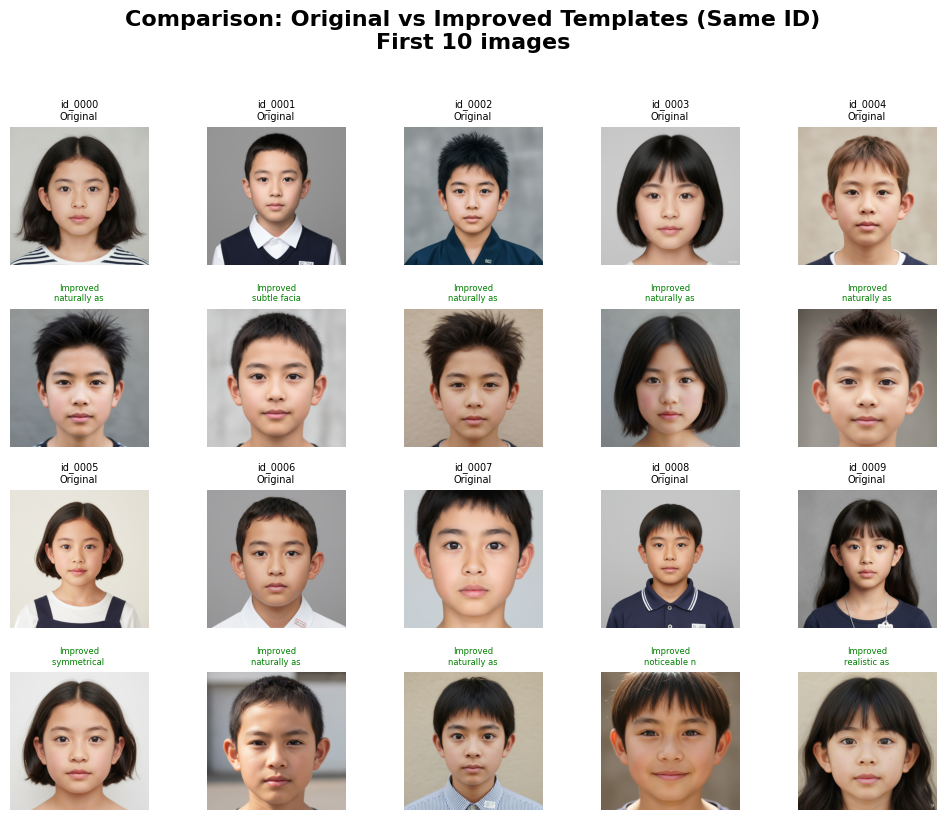

✓ Saved: comparison_original_vs_improved_50.png


In [54]:
# Preview: Compare Original (selected_1000_ids) vs Improved Templates (stage_1_multi_template_dataset_improved_templates)
# Using metadata to ensure matching by same ID
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import json

def preview_original_vs_improved(
    original_dir: str = "./selected_1000_ids",
    improved_dir: str = "./stage_1_multi_template_dataset_improved_templates",
    improved_metadata_file: str = "./stage_1_multi_template_dataset_improved_templates/metadata.json",
    num_images: int = 50,
    cols: int = 10,
    figsize_per_image: float = 2.0
):
    """
    Preview side-by-side comparison of original images vs improved template images.
    Uses metadata to ensure matching by SAME ID.
    
    Args:
        original_dir: Path to original images folder (selected_1000_ids)
        improved_dir: Path to improved template images folder
        improved_metadata_file: Path to metadata.json with ID mapping
        num_images: Number of images to compare (first N)
        cols: Number of columns in the grid
        figsize_per_image: Size per image cell
    """
    original_path = Path(original_dir)
    improved_path = Path(improved_dir)
    
    # Load metadata to get ID mapping
    with open(improved_metadata_file, 'r') as f:
        metadata = json.load(f)
    
    print(f"Loaded metadata with {len(metadata)} entries")
    
    # Build mapping: image_id -> improved image info
    id_to_improved = {}
    for key, info in metadata.items():
        image_id = info.get('image_id', '')
        character_id = info.get('character_id', -1)
        local_path = info.get('local_path', '').strip()
        
        if image_id and local_path:
            id_to_improved[image_id] = {
                'character_id': character_id,
                'local_path': improved_path.parent / local_path,
                'key': key,
                'skin_texture': info.get('skin_texture', ''),
                'eye_asymmetry': info.get('eye_asymmetry', ''),
                'facial_symmetry': info.get('facial_symmetry', ''),
                'hair_imperfection': info.get('hair_imperfection', '')
            }
    
    print(f"Built ID mapping for {len(id_to_improved)} images")
    
    # Collect image pairs - matching by SAME ID
    image_pairs = []
    
    for i in range(min(num_images, len(id_to_improved))):
        image_id = f"id_{i:04d}"
        
        # Original image
        orig_img = original_path / f"{image_id}.png"
        
        # Improved image from metadata
        improved_info = id_to_improved.get(image_id, {})
        improved_img = improved_info.get('local_path')
        
        if orig_img.exists() or improved_img:
            image_pairs.append({
                'id': i,
                'image_id': image_id,
                'original': orig_img if orig_img.exists() else None,
                'improved': improved_img if improved_img and improved_img.exists() else None,
                'improved_info': improved_info
            })
    
    print(f"Found {len(image_pairs)} matching image pairs (by same ID)")
    
    # Show ID verification
    print("\nID Verification (first 5):")
    for pair in image_pairs[:5]:
        orig_exists = "✓" if pair['original'] and pair['original'].exists() else "✗"
        improved_exists = "✓" if pair['improved'] and pair['improved'].exists() else "✗"
        print(f"  {pair['image_id']}: Original {orig_exists} | Improved {improved_exists}")
    
    # Calculate grid dimensions
    rows = (len(image_pairs) + cols - 1) // cols
    
    # Create comparison figure - 2 rows per image row (original + improved)
    fig, axes = plt.subplots(rows * 2, cols, figsize=(cols * figsize_per_image, rows * 2 * figsize_per_image))
    fig.suptitle(f'Comparison: Original vs Improved Templates (Same ID)\nFirst {num_images} images', 
                 fontsize=16, fontweight='bold', y=1.02)
    
    # Flatten axes for easier indexing
    if rows * 2 == 1:
        axes = axes.reshape(1, -1)
    
    for idx, pair in enumerate(image_pairs):
        row_base = (idx // cols) * 2
        col = idx % cols
        
        # Original image (top row)
        ax_orig = axes[row_base, col]
        if pair['original'] and pair['original'].exists():
            try:
                img = Image.open(pair['original'])
                ax_orig.imshow(img)
                ax_orig.set_title(f"{pair['image_id']}\nOriginal", fontsize=7)
            except Exception as e:
                ax_orig.text(0.5, 0.5, f"Error\n{pair['image_id']}", ha='center', va='center', fontsize=6)
        else:
            ax_orig.text(0.5, 0.5, f"{pair['image_id']}\nNot Found", ha='center', va='center', fontsize=6)
        ax_orig.axis('off')
        
        # Improved image (bottom row)
        ax_improved = axes[row_base + 1, col]
        if pair['improved'] and pair['improved'].exists():
            try:
                img = Image.open(pair['improved'])
                ax_improved.imshow(img)
                # Show some improvement info
                info = pair.get('improved_info', {})
                title = f"Improved\n{info.get('facial_symmetry', '')[:12]}"
                ax_improved.set_title(title, fontsize=6, color='green')
            except Exception as e:
                ax_improved.text(0.5, 0.5, f"Error", ha='center', va='center', fontsize=6)
        else:
            ax_improved.text(0.5, 0.5, "Not Found", ha='center', va='center', fontsize=6)
        ax_improved.axis('off')
    
    # Hide unused axes
    total_used = len(image_pairs)
    for idx in range(total_used, rows * cols):
        row_base = (idx // cols) * 2
        col = idx % cols
        if row_base < rows * 2:
            axes[row_base, col].axis('off')
            axes[row_base + 1, col].axis('off')
    
    plt.tight_layout()
    plt.savefig('comparison_original_vs_improved_50.png', dpi=150, bbox_inches='tight')
    plt.show()
    print(f"✓ Saved: comparison_original_vs_improved_50.png")


# Run comparison for first 50 images - MATCHING BY SAME ID
preview_original_vs_improved(
    original_dir="./selected_1000_ids",
    improved_dir="./stage_1_multi_template_dataset_improved_templates",
    improved_metadata_file="./stage_1_multi_template_dataset_improved_templates/metadata.json",
    num_images=10,
    cols=5,
    figsize_per_image=2.0
)

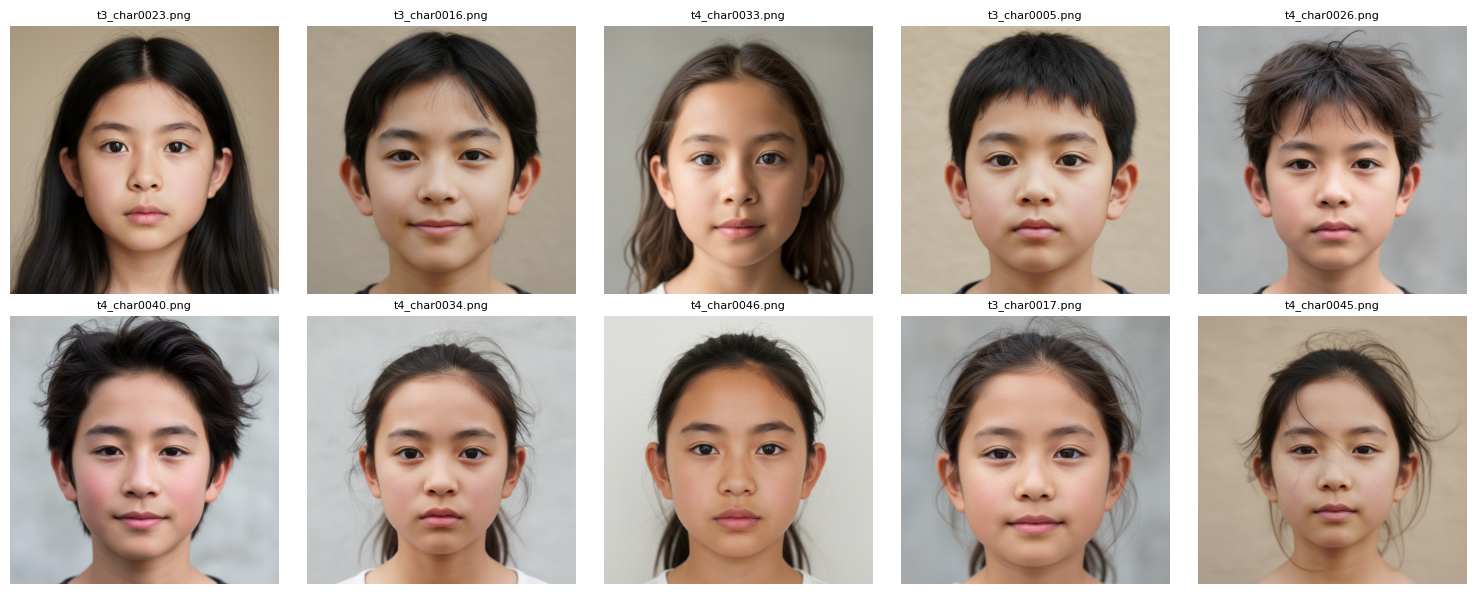

In [55]:
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

def preview_samples(output_dir: str, num_samples: int = 10):
    """Preview random samples from dataset."""
    images = list(Path(output_dir).rglob("*.png"))
    if not images:
        print("No images found")
        return
    
    samples = random.sample(images, min(num_samples, len(images)))
    cols = 5
    rows = (len(samples) + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3*rows))
    axes = axes.flatten() if rows > 1 else [axes] if cols == 1 else axes
    
    for ax, img_path in zip(axes, samples):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(img_path.name[:20], fontsize=8)
        ax.axis('off')
    
    for ax in axes[len(samples):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

sample_dir = "./stage_1_multi_template_dataset_new_ids"
preview_samples(sample_dir, num_samples=10)

# t-SNE Analysis for Template Selection

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform
import sys
sys.path.append('..')
from models import FaceNetModel, InceptionModel

DATASET_PATH = Path('./stage_2_multi_template_dataset')

# Load metadata
with open(DATASET_PATH / 'metadata.json', 'r') as f:
    metadata = json.load(f)

# Stage 1: Parse images by template
template_images = {}
# for key, info in metadata.items():
#     template_ver = info['template_version']
#     img_path = DATASET_PATH.parent / info['local_path']
#     if template_ver not in template_images:
#         template_images[template_ver] = []
#     template_images[template_ver].append({
#         'path': img_path,
#         'character_id': info['character_id'],
#         'key': key
#     })

# Stage 2: Parse images by template from original character IDs
# for key, info in metadata.items():
#     if key.endswith('_c'):
#         original_id = info['original_custom_id']
#         original_info = metadata.get(original_id, {})
#         if "_c" not in template_images:
#             template_images["_c"] = []
#         template_images["_c"].append({
#             'path': DATASET_PATH.parent / info['local_path'],
#             'character_id': info['character_id'],
#             'key': key
#         })
#     elif key.endswith('_d'):
#         original_id = info['original_custom_id']
#         original_info = metadata.get(original_id, {})
#         if "_d" not in template_images:
#             template_images["_d"] = []
#         template_images["_d"].append({
#             'path': DATASET_PATH.parent / info['local_path'],
#             'character_id': info['character_id'],
#             'key': key
#         })

print(f"Found {len(template_images)} templates:")
for t, imgs in sorted(template_images.items()):
    print(f"  Template {t}: {len(imgs)} images")

Found 2 templates:
  Template _c: 15 images
  Template _d: 15 images


In [2]:
# Initialize FaceNet model
# model = FaceNetModel(device='auto', use_facenet=True)
model = InceptionModel(device='auto')
print("✓ FaceNet model loaded")

Loading InceptionV3 model...


InceptionV3 loaded on cuda
✓ FaceNet model loaded


In [3]:
# Extract embeddings for each template
template_embeddings = {}

for template_ver, images in sorted(template_images.items()):
    print(f"\n[Template {template_ver}] Extracting embeddings...")
    embeddings = []
    char_ids = []
    
    for img_info in images:
        try:
            preprocessed = model.preprocess(img_info['path'])
            features = model.inference(preprocessed)
            embedding = model.postprocess(features, output_type='embedding')
            embeddings.append(embedding[0])
            char_ids.append(img_info['character_id'])
        except Exception as e:
            print(f"  Error: {img_info['path']}: {e}")
    
    template_embeddings[template_ver] = {
        'embeddings': np.array(embeddings),
        'char_ids': char_ids
    }
    print(f"  ✓ {len(embeddings)} embeddings extracted")

print(f"\n✓ All embeddings extracted")


[Template _c] Extracting embeddings...
  ✓ 15 embeddings extracted

[Template _d] Extracting embeddings...
  ✓ 15 embeddings extracted

✓ All embeddings extracted


In [4]:
def compute_tsne(embeddings, perplexity=5, random_state=42):
    n_samples = len(embeddings)
    perplexity = min(perplexity, (n_samples - 1) // 3)
    tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=1000, 
                random_state=random_state, metric='cosine')
    return tsne.fit_transform(embeddings)

def calculate_separation_metrics(embeddings_2d):
    """Calculate within-cluster distance (avg pairwise distance between all points)"""
    if len(embeddings_2d) < 2:
        return {'avg_pairwise_dist': 0, 'min_dist': 0, 'max_dist': 0}
    
    dist_matrix = squareform(pdist(embeddings_2d, metric='euclidean'))
    upper_tri = dist_matrix[np.triu_indices_from(dist_matrix, k=1)]
    
    return {
        'avg_pairwise_dist': float(np.mean(upper_tri)),
        'min_dist': float(np.min(upper_tri)),
        'max_dist': float(np.max(upper_tri)),
        'std_dist': float(np.std(upper_tri))
    }

def count_close_pairs(embeddings_2d, threshold=3.0):
    """Count pairs closer than threshold (potential duplicates)"""
    if len(embeddings_2d) < 2:
        return 0, 0
    dist_matrix = squareform(pdist(embeddings_2d, metric='euclidean'))
    upper_tri = dist_matrix[np.triu_indices_from(dist_matrix, k=1)]
    close_pairs = np.sum(upper_tri < threshold)
    total_pairs = len(upper_tri)
    return close_pairs, total_pairs

print("✓ Metrics functions defined")

✓ Metrics functions defined


In [5]:
# Compute t-SNE and metrics for each template
template_results = {}

print("="*60)
print("t-SNE METRICS PER TEMPLATE")
print("="*60)

for template_ver, data in sorted(template_embeddings.items()):
    embeddings = data['embeddings']
    
    # Compute t-SNE
    embeddings_2d = compute_tsne(embeddings)
    
    # Calculate metrics
    metrics = calculate_separation_metrics(embeddings_2d)
    close_pairs, total_pairs = count_close_pairs(embeddings_2d, threshold=3.0)
    
    metrics['close_pairs'] = close_pairs
    metrics['total_pairs'] = total_pairs
    metrics['duplicate_ratio'] = close_pairs / total_pairs if total_pairs > 0 else 0
    
    template_results[template_ver] = {
        'embeddings_2d': embeddings_2d,
        'metrics': metrics
    }
    
    print(f"\n[Template {template_ver}]")
    print(f"  Avg Pairwise Distance: {metrics['avg_pairwise_dist']:.4f}")
    print(f"  Min Distance: {metrics['min_dist']:.4f}")
    print(f"  Close Pairs (<3.0): {close_pairs}/{total_pairs} ({metrics['duplicate_ratio']*100:.1f}%)")

t-SNE METRICS PER TEMPLATE

[Template _c]
  Avg Pairwise Distance: 100.2731
  Min Distance: 4.0280
  Close Pairs (<3.0): 0/105 (0.0%)

[Template _d]
  Avg Pairwise Distance: 50.0141
  Min Distance: 1.4038
  Close Pairs (<3.0): 18/105 (17.1%)


In [6]:
# Ranking templates by diversity (higher avg distance = more diverse = less duplicates)
import pandas as pd

ranking_data = []
for t_ver, result in template_results.items():
    m = result['metrics']
    ranking_data.append({
        'Template': f"T{t_ver}",
        'Avg Distance': m['avg_pairwise_dist'],
        'Min Distance': m['min_dist'],
        'Close Pairs': m['close_pairs'],
        'Duplicate %': m['duplicate_ratio'] * 100
    })

df_ranking = pd.DataFrame(ranking_data)
df_ranking = df_ranking.sort_values('Avg Distance', ascending=False)
df_ranking = df_ranking.reset_index(drop=True)
df_ranking.index = df_ranking.index + 1

print("\n" + "="*60)
print("TEMPLATE RANKING (Higher Distance = Better Diversity)")
print("="*60)
print(df_ranking.to_string())

best_template = df_ranking.iloc[0]['Template']
print(f"\n🏆 Best Template: {best_template} (highest diversity, lowest duplicate risk)")


TEMPLATE RANKING (Higher Distance = Better Diversity)
  Template  Avg Distance  Min Distance  Close Pairs  Duplicate %
1      T_c    100.273103      4.027953            0     0.000000
2      T_d     50.014085      1.403765           18    17.142857

🏆 Best Template: T_c (highest diversity, lowest duplicate risk)


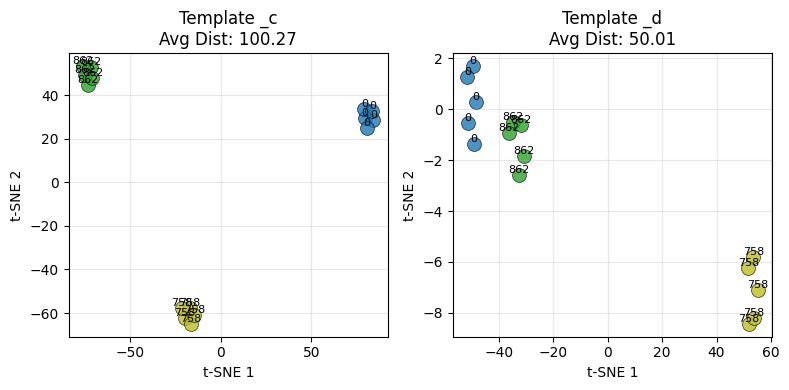

✓ Saved: template_tsne_comparison.png


In [15]:
# Visualize t-SNE for all templates
fig, axes = plt.subplots(1, len(template_results), figsize=(4*len(template_results), 4))
if len(template_results) == 1:
    axes = [axes]

colors = plt.cm.tab10(np.linspace(0, 1, 10))

for idx, (t_ver, result) in enumerate(sorted(template_results.items())):
    ax = axes[idx]
    embeddings_2d = result['embeddings_2d']
    char_ids = template_embeddings[t_ver]['char_ids']
    
    for i, (x, y) in enumerate(embeddings_2d):
        ax.scatter(x, y, c=[colors[char_ids[i] % 10]], s=100, alpha=0.8, edgecolors='black', linewidths=0.5)
        ax.annotate(str(char_ids[i]), (x, y), fontsize=8, ha='center', va='bottom')
    
    m = result['metrics']
    ax.set_title(f"Template {t_ver}\nAvg Dist: {m['avg_pairwise_dist']:.2f}")
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('template_tsne_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("✓ Saved: template_tsne_comparison.png")

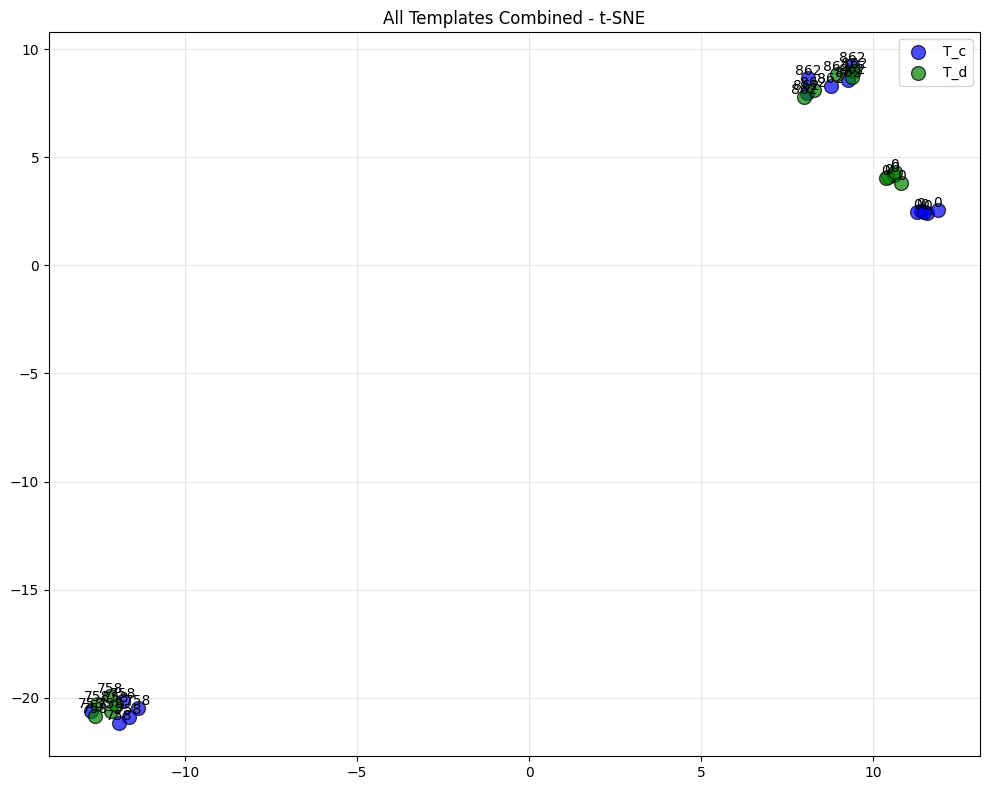

✓ Saved: all_templates_tsne.png


In [14]:
# Cross-template analysis: combine all and check overlap
all_embeddings = []
all_labels = []
all_ids = []

for t_ver, data in sorted(template_embeddings.items()):
    all_embeddings.append(data['embeddings'])
    all_labels.extend([f"T{t_ver}" for _ in range(len(data['embeddings']))])
    all_ids.extend(data['char_ids'])

all_embeddings = np.vstack(all_embeddings)
all_embeddings_2d = compute_tsne(all_embeddings, perplexity=10)

# Plot combined t-SNE
fig, ax = plt.subplots(figsize=(10, 8))
# Stage 1
# template_colors = {'T1': 'red', 'T2': 'blue', 'T3': 'green', 'T4': 'orange', 'T5': 'purple'}
# Stage 2
template_colors = {'T_c': 'blue', 'T_d': 'green'}

for label in sorted(set(all_labels)):
    mask = np.array(all_labels) == label
    ax.scatter(all_embeddings_2d[mask, 0], all_embeddings_2d[mask, 1],
               c=template_colors.get(label, 'gray'), label=label, s=100, alpha=0.7, edgecolors='black')
    # log id of each embedding
    for i in np.where(mask)[0]:
        ax.annotate(str(all_ids[i]), (all_embeddings_2d[i, 0], all_embeddings_2d[i, 1]),
                    fontsize=10, ha='center', va='bottom')

ax.set_title('All Templates Combined - t-SNE')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('all_templates_tsne.png', dpi=150, bbox_inches='tight')
plt.show()
print("✓ Saved: all_templates_tsne.png")

# Comparison: t-SNE and Cosine Similarity Analysis

Compare 50 images from 3 folders:
1. **Original**: `selected_1000_ids/` (first 50 images)
2. **Improved Templates**: `stage_1_multi_template_dataset_improved_templates/` (first 50 images, same IDs)
3. **New IDs**: `stage_1_multi_template_dataset_new_ids/` (first 50 images, new IDs)

In [56]:
# Setup: Load images from 3 folders for comparison
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform
import sys
sys.path.append('..')
from models import FaceNetModel, InceptionModel

# Initialize model
model = InceptionModel(device='auto')
print("✓ Model loaded")

# Define folders
ORIGINAL_DIR = Path('./selected_1000_ids')
IMPROVED_DIR = Path('./stage_1_multi_template_dataset_improved_templates')
NEW_IDS_DIR = Path('./stage_1_multi_template_dataset_new_ids')
NUM_IMAGES = 50

# Collect images from each folder
def collect_images(folder_path, pattern, num_images=50, is_nested=False):
    """Collect first N images from a folder"""
    images = []
    
    if is_nested:
        # Nested structure: character_XXXX/file.png
        for i in range(num_images):
            char_dir = folder_path / f"character_{i:04d}"
            if char_dir.exists():
                img_files = list(char_dir.glob("*.png"))
                if img_files:
                    images.append({'id': i, 'path': img_files[0]})
    else:
        # Flat structure: id_XXXX.png
        for i in range(num_images):
            img_path = folder_path / f"{pattern}{i:04d}.png"
            if img_path.exists():
                images.append({'id': i, 'path': img_path})
    
    return images

# Collect images
original_images = collect_images(ORIGINAL_DIR, "id_", NUM_IMAGES, is_nested=False)
improved_images = collect_images(IMPROVED_DIR, "", NUM_IMAGES, is_nested=True)
new_ids_images = collect_images(NEW_IDS_DIR, "", NUM_IMAGES, is_nested=True)

print(f"\n{'='*60}")
print("IMAGES LOADED")
print(f"{'='*60}")
print(f"Original (selected_1000_ids):      {len(original_images)} images")
print(f"Improved Templates:                 {len(improved_images)} images")
print(f"New IDs:                            {len(new_ids_images)} images")

# Store all datasets
datasets = {
    'Original': {'images': original_images, 'color': 'blue'},
    'Improved': {'images': improved_images, 'color': 'green'},
    'New_IDs': {'images': new_ids_images, 'color': 'red'}
}

Loading InceptionV3 model...
InceptionV3 loaded on cuda
✓ Model loaded

IMAGES LOADED
Original (selected_1000_ids):      50 images
Improved Templates:                 50 images
New IDs:                            50 images


In [57]:
# Extract embeddings for each dataset
def extract_embeddings(images, model):
    """Extract embeddings for a list of images"""
    embeddings = []
    ids = []
    names = []
    
    for img_info in images:
        try:
            preprocessed = model.preprocess(img_info['path'])
            features = model.inference(preprocessed)
            embedding = model.postprocess(features, output_type='embedding')
            embeddings.append(embedding[0])
            ids.append(img_info['id'])
            names.append(img_info['path'].name)
        except Exception as e:
            print(f"  Error: {img_info['path']}: {e}")
    
    return np.array(embeddings), ids, names

# Extract embeddings for all datasets
dataset_embeddings = {}

for name, data in datasets.items():
    print(f"\n[{name}] Extracting embeddings...")
    embeddings, ids, names = extract_embeddings(data['images'], model)
    dataset_embeddings[name] = {
        'embeddings': embeddings,
        'ids': ids,
        'names': names,
        'color': data['color']
    }
    print(f"  ✓ {len(embeddings)} embeddings extracted")

print(f"\n✓ All embeddings extracted")


[Original] Extracting embeddings...
  ✓ 50 embeddings extracted

[Improved] Extracting embeddings...
  ✓ 50 embeddings extracted

[New_IDs] Extracting embeddings...
  ✓ 50 embeddings extracted

✓ All embeddings extracted


In [58]:
# Compute cosine similarity statistics for each dataset
from scipy.spatial.distance import cosine
from scipy.spatial.distance import cdist

def compute_intra_similarity(embeddings):
    """Compute pairwise cosine similarity within a dataset"""
    # Compute cosine distance matrix
    dist_matrix = cdist(embeddings, embeddings, metric='cosine')
    # Convert to similarity (1 - distance)
    sim_matrix = 1 - dist_matrix
    
    # Get upper triangle (excluding diagonal)
    n = len(embeddings)
    upper_indices = np.triu_indices(n, k=1)
    similarities = sim_matrix[upper_indices]
    
    return sim_matrix, similarities

# Compute statistics for each dataset
print("=" * 60)
print("COSINE SIMILARITY STATISTICS")
print("=" * 60)

dataset_stats = {}
for name, data in dataset_embeddings.items():
    embeddings = data['embeddings']
    sim_matrix, similarities = compute_intra_similarity(embeddings)
    
    stats = {
        'mean': np.mean(similarities),
        'std': np.std(similarities),
        'min': np.min(similarities),
        'max': np.max(similarities),
        'median': np.median(similarities),
        'num_pairs': len(similarities),
        'sim_matrix': sim_matrix
    }
    dataset_stats[name] = stats
    
    print(f"\n[{name}]")
    print(f"  Mean:   {stats['mean']:.4f}")
    print(f"  Std:    {stats['std']:.4f}")
    print(f"  Min:    {stats['min']:.4f}")
    print(f"  Max:    {stats['max']:.4f}")
    print(f"  Median: {stats['median']:.4f}")
    print(f"  Pairs:  {stats['num_pairs']}")

print("\n" + "=" * 60)

COSINE SIMILARITY STATISTICS

[Original]
  Mean:   0.7338
  Std:    0.0696
  Min:    0.4862
  Max:    0.8571
  Median: 0.7405
  Pairs:  1225

[Improved]
  Mean:   0.8294
  Std:    0.0588
  Min:    0.6185
  Max:    0.9614
  Median: 0.8385
  Pairs:  1225

[New_IDs]
  Mean:   0.8419
  Std:    0.0501
  Min:    0.6691
  Max:    0.9603
  Median: 0.8467
  Pairs:  1225



Applying t-SNE...
✓ t-SNE completed


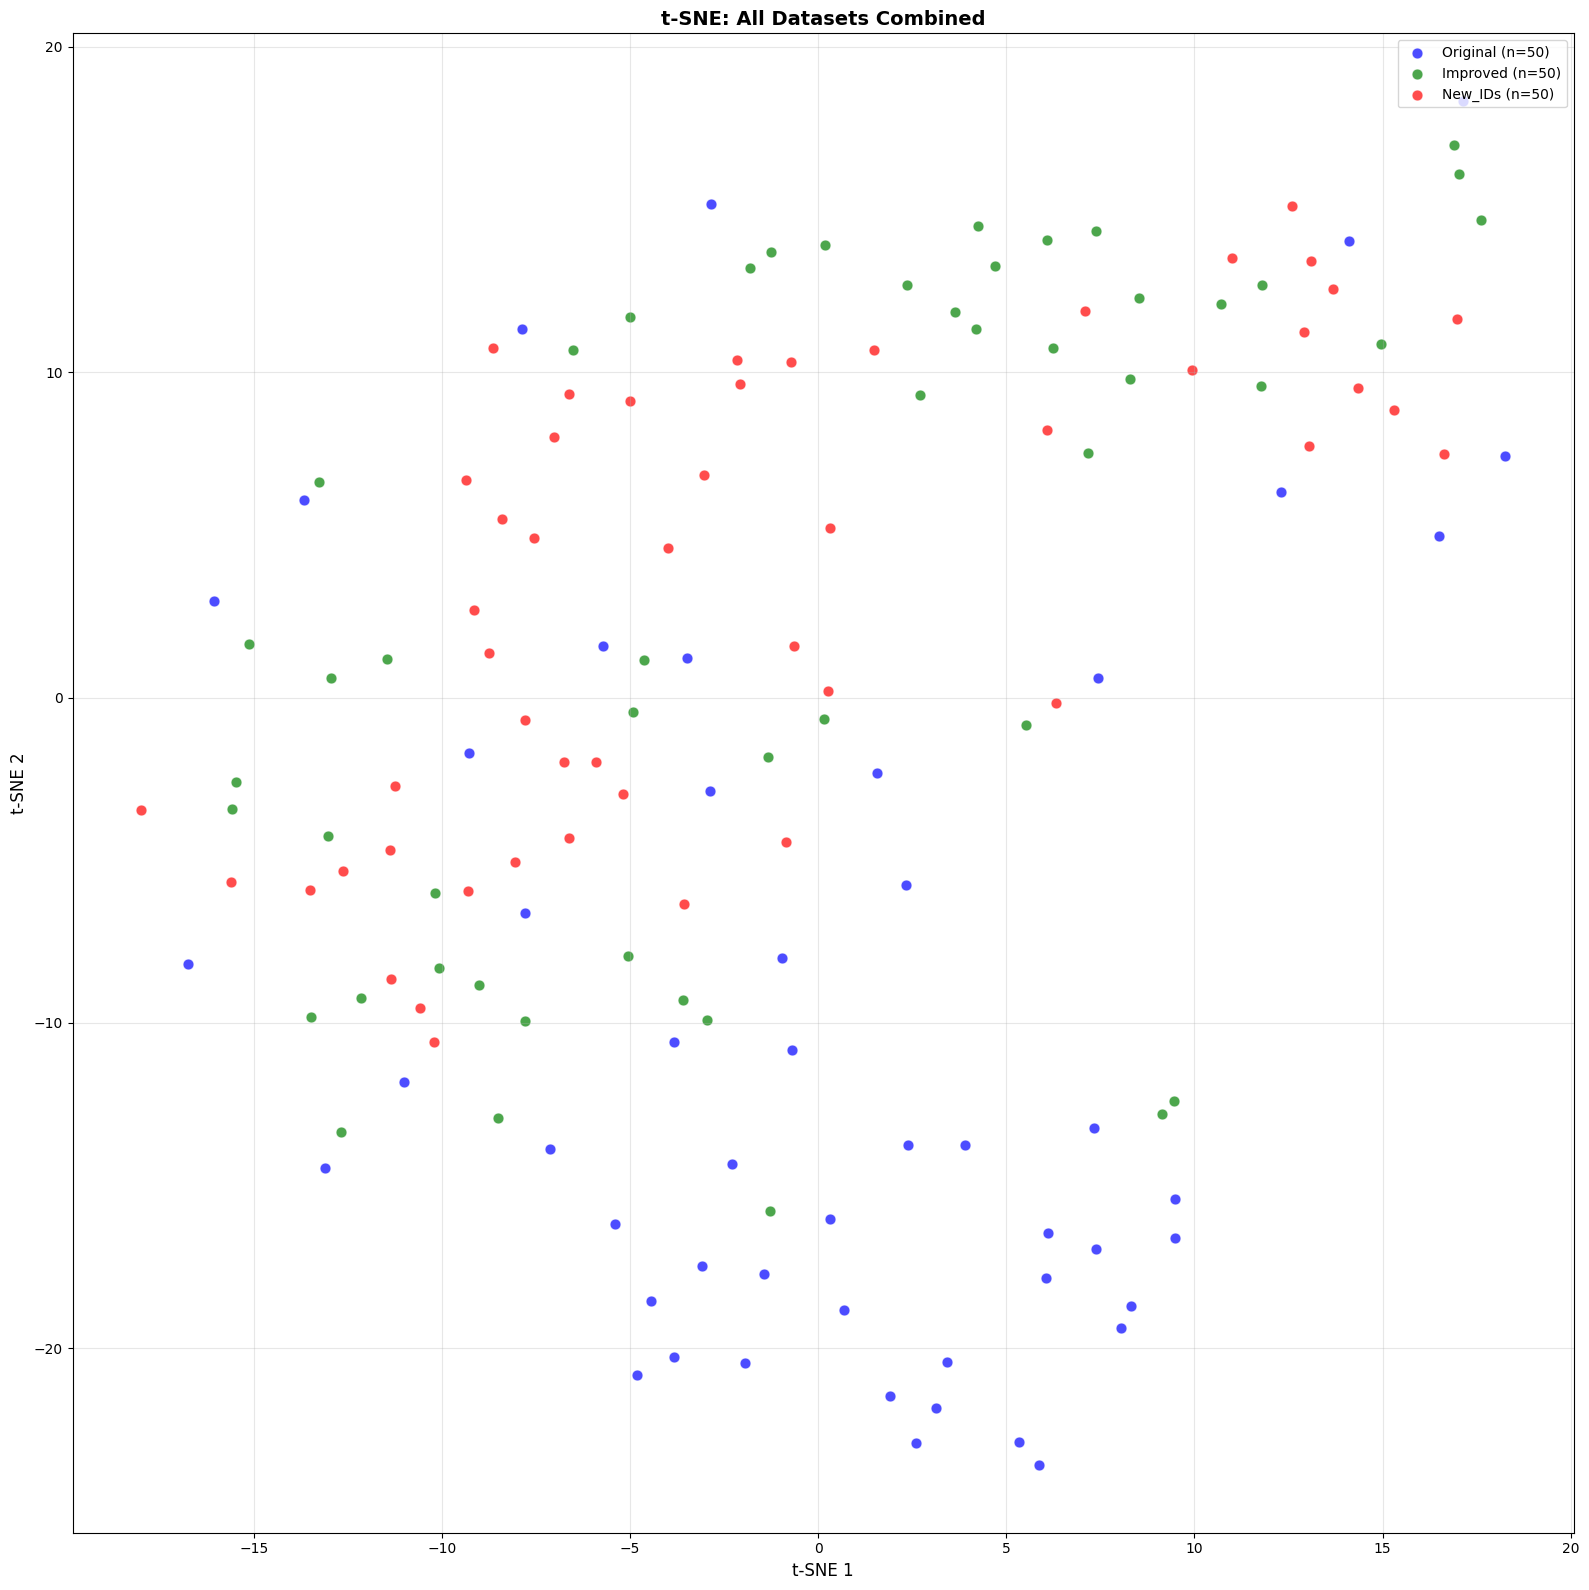

✓ Saved: tsne_3folder_comparison.png


In [73]:
# Visualization 1: t-SNE comparison
from sklearn.manifold import TSNE

# Combine all embeddings for t-SNE
all_embeddings = []
all_labels = []
all_colors = []

for name, data in dataset_embeddings.items():
    all_embeddings.append(data['embeddings'])
    all_labels.extend([name] * len(data['embeddings']))
    all_colors.extend([data['color']] * len(data['embeddings']))

all_embeddings = np.vstack(all_embeddings)

# Apply t-SNE
print("Applying t-SNE...")
tsne = TSNE(n_components=2, perplexity=15, random_state=42, max_iter=1000)
tsne_result = tsne.fit_transform(all_embeddings)
print("✓ t-SNE completed")

# Plot t-SNE
fig, axes = plt.subplots(1, 1, figsize=(16, 16))

# Left: Combined view
ax1 = axes
label_set = list(dataset_embeddings.keys())
for name, data in dataset_embeddings.items():
    mask = np.array(all_labels) == name
    ax1.scatter(
        tsne_result[mask, 0], 
        tsne_result[mask, 1], 
        c=data['color'], 
        label=f"{name} (n={mask.sum()})",
        alpha=0.7,
        s=60,
        edgecolors='white',
        linewidths=0.5
    )

ax1.set_xlabel('t-SNE 1', fontsize=12)
ax1.set_ylabel('t-SNE 2', fontsize=12)
ax1.set_title('t-SNE: All Datasets Combined', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('tsne_3folder_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("✓ Saved: tsne_3folder_comparison.png")

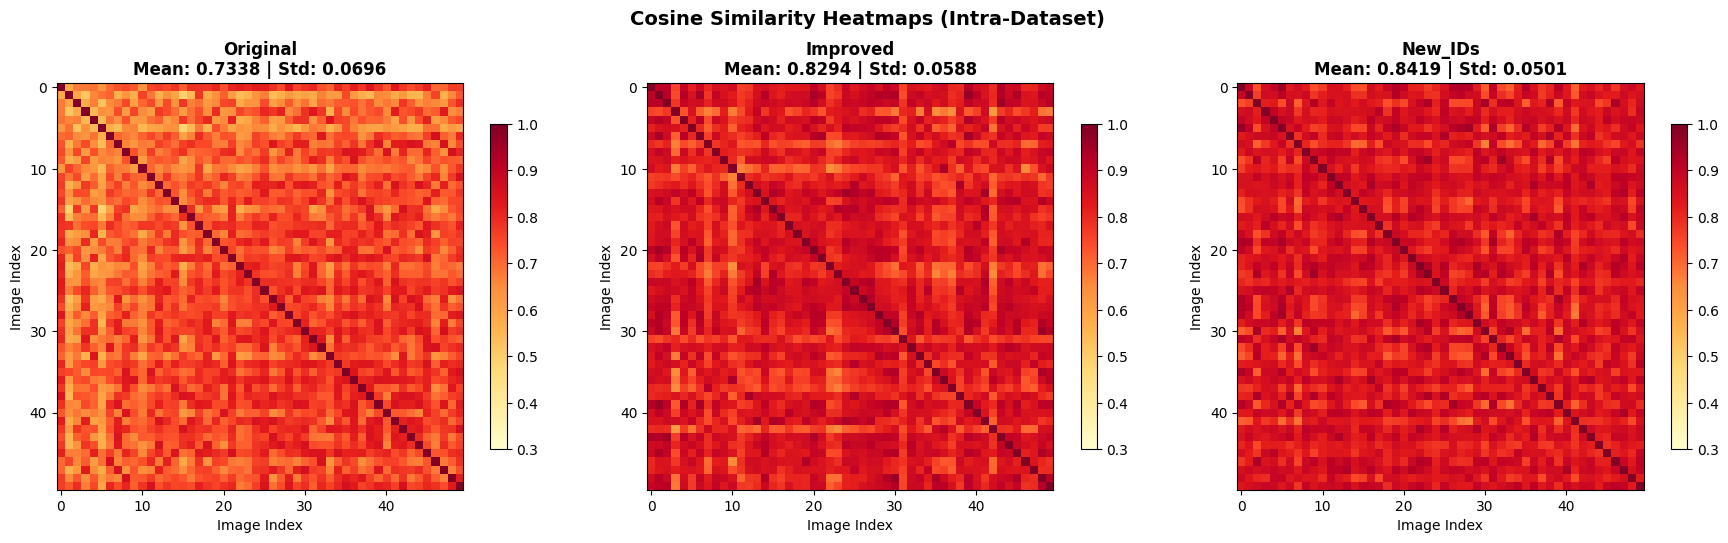

✓ Saved: cosine_heatmaps_3folder.png


In [61]:
# Visualization 2: Cosine Similarity Heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, stats) in enumerate(dataset_stats.items()):
    ax = axes[idx]
    color = dataset_embeddings[name]['color']
    
    im = ax.imshow(stats['sim_matrix'], cmap='YlOrRd', vmin=0.3, vmax=1.0)
    ax.set_title(f"{name}\nMean: {stats['mean']:.4f} | Std: {stats['std']:.4f}", 
                 fontsize=12, fontweight='bold')
    ax.set_xlabel('Image Index')
    ax.set_ylabel('Image Index')
    plt.colorbar(im, ax=ax, shrink=0.8)

plt.suptitle('Cosine Similarity Heatmaps (Intra-Dataset)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('cosine_heatmaps_3folder.png', dpi=150, bbox_inches='tight')
plt.show()
print("✓ Saved: cosine_heatmaps_3folder.png")

/tmp/ipykernel_503891/2063381322.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(similarity_data, labels=names, patch_artist=True)


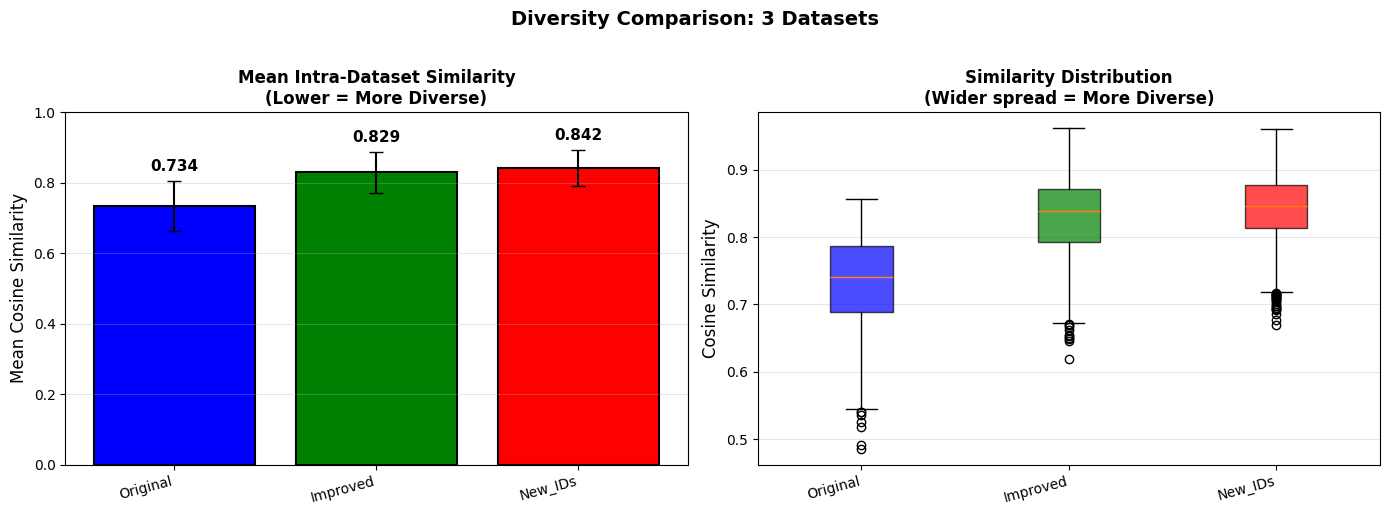

✓ Saved: diversity_comparison_3folder.png

INTERPRETATION:
• Lower mean similarity → More diverse faces
• Higher std → More variation in similarity (some similar, some different)
• Wider boxplot spread → More diversity in pairwise comparisons


In [62]:
# Visualization 3: Summary Comparison Bar Chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

names = list(dataset_stats.keys())
colors = [dataset_embeddings[n]['color'] for n in names]

# Bar chart: Mean similarity
ax1 = axes[0]
means = [dataset_stats[n]['mean'] for n in names]
stds = [dataset_stats[n]['std'] for n in names]
x = np.arange(len(names))
bars = ax1.bar(x, means, yerr=stds, color=colors, capsize=5, edgecolor='black', linewidth=1.5)
ax1.set_xticks(x)
ax1.set_xticklabels(names, rotation=15, ha='right')
ax1.set_ylabel('Mean Cosine Similarity', fontsize=12)
ax1.set_title('Mean Intra-Dataset Similarity\n(Lower = More Diverse)', fontsize=12, fontweight='bold')
ax1.set_ylim(0, 1)
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bar, mean, std in zip(bars, means, stds):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.02,
             f'{mean:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Box plot: Similarity distribution
ax2 = axes[1]
similarity_data = []
for name in names:
    embeddings = dataset_embeddings[name]['embeddings']
    _, similarities = compute_intra_similarity(embeddings)
    similarity_data.append(similarities)

bp = ax2.boxplot(similarity_data, labels=names, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_ylabel('Cosine Similarity', fontsize=12)
ax2.set_title('Similarity Distribution\n(Wider spread = More Diverse)', fontsize=12, fontweight='bold')
ax2.set_xticklabels(names, rotation=15, ha='right')
ax2.grid(axis='y', alpha=0.3)

plt.suptitle('Diversity Comparison: 3 Datasets', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('diversity_comparison_3folder.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Saved: diversity_comparison_3folder.png")
print("\n" + "=" * 60)
print("INTERPRETATION:")
print("=" * 60)
print("• Lower mean similarity → More diverse faces")
print("• Higher std → More variation in similarity (some similar, some different)")
print("• Wider boxplot spread → More diversity in pairwise comparisons")
print("=" * 60)

## 📊 Nhận xét và Phân tích Kết quả t-SNE & Cosine Similarity

### 1. Phân tích t-SNE Visualization

**Quan sát chính:**
- **Original (Xanh dương)**: Phân bố tập trung mạnh ở vùng **phía dưới** của đồ thị (y < 0), đặc biệt có một cụm dày đặc ở khu vực (x: 0-10, y: -20 đến -10). Điều này cho thấy các khuôn mặt trong dataset gốc có xu hướng **tương đồng cao** với nhau.

- **Improved (Xanh lá)**: Phân bố **đều hơn** trên toàn bộ không gian, với sự hiện diện ở cả vùng trên (y > 0) và dưới. Các điểm không tập trung thành cụm dày đặc như Original.

- **New_IDs (Đỏ)**: Tương tự Improved, phân bố **rải đều** trên không gian, đặc biệt có nhiều điểm ở vùng giữa và trên (y từ 0 đến 15).

### 2. Phân tích Cosine Similarity

| Dataset | Mean | Std | Min | Max | Nhận xét |
|---------|------|-----|-----|-----|----------|
| **Original** | 0.7338 | 0.0696 | 0.4862 | 0.8571 | Mean thấp nhất → **Đa dạng nhất** |
| **Improved** | 0.8294 | 0.0588 | 0.6185 | 0.9614 | Mean cao hơn, nhưng std thấp |
| **New_IDs** | 0.8419 | 0.0501 | 0.6691 | 0.9603 | Mean cao nhất, std thấp nhất |

### 3. Kết luận

⚠️ **Kết quả không hoàn toàn như mong đợi:**

1. **Về t-SNE**: Đúng là Improved và New_IDs phân bố **đều hơn trên không gian 2D**, không có hiện tượng tụm cụm dày đặc như Original. Điều này cho thấy các khuôn mặt đã có sự **đa dạng về mặt hình học (face geometry)**.

2. **Về Cosine Similarity**: Tuy nhiên, số liệu cho thấy **Original có mean cosine similarity thấp nhất (0.7338)**, trong khi Improved (0.8294) và New_IDs (0.8419) có mean cao hơn. Điều này có nghĩa:
   - Các khuôn mặt trong Improved/New_IDs **giống nhau hơn** về mặt embedding so với Original
   - Mặc dù phân bố đều hơn trên t-SNE, các features vẫn gần nhau trong không gian embedding gốc

3. **Giải thích có thể:**
   - Dataset Original được tạo bởi nhiều người (crowdsourced) → có sự đa dạng tự nhiên về style
   - Improved/New_IDs được tạo từ cùng một pipeline với variations được định nghĩa sẵn → có thể bị giới hạn bởi template
   - t-SNE chỉ là phép chiếu 2D, không phản ánh hoàn toàn khoảng cách trong không gian embedding gốc

### 4. Hướng cải thiện

- Cần **mở rộng thêm variations** cho các template (đặc biệt là unique features như vết bớt, tàn nhang, sẹo)
- Cân nhắc sử dụng **random combination** thay vì fixed template
- Thử nghiệm với các **negative prompts** để tăng sự khác biệt

# Thử nghiệm với Gemini 3 Pro Image Preview
This section:
1. Reads 5 examples from `prompt_csv_enhance_50.csv`
2. Generates 5 images using old prompts
3. Generates 5 images using new prompts (enhanced)
4. Visualizes the generated images
5. Computes t-SNE with InceptionV3 model to compare embeddings

In [4]:
# Step 1: Load required libraries and read CSV
import pandas as pd
import os
from pathlib import Path
from datetime import datetime
import base64
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Read CSV file with 5 examples
csv_path = "./prompt_csv_enhance_50.csv"
df = pd.read_csv(csv_path)

# Get first 5 examples
df_sample = df.head(5)
print(f"✓ Loaded {len(df_sample)} examples from CSV")
print("\nSample prompts:")
for idx, row in df_sample.iterrows():
    print(f"\n--- Example {idx} ---")
    print(f"Old prompt: {row['old_prompt'][:100]}...")
    print(f"New prompt: {row['new_prompt'][:100]}...")

✓ Loaded 5 examples from CSV

Sample prompts:

--- Example 0 ---
Old prompt: Portrait of a Japanese boy child, 8-10 years old, Character#0.
This child has a oval face with fair ...
New prompt: Japanese boy child portrait, 8-10 years old, ID:0, oval face, fair skin, slightly uneven skin textur...

--- Example 1 ---
Old prompt: Japanese boy child portrait, 8-10 years old, ID:758, heart-shaped face, fair skin, slightly elongate...
New prompt: Japanese boy child portrait, 8-10 years old, ID:1, heart-shaped face, fair skin, natural skin with s...

--- Example 2 ---
Old prompt: Japanese boy child portrait, 8-10 years old, ID:862, oval face, light skin, balanced proportions, na...
New prompt: Japanese boy child portrait, 8-10 years old, ID:2, oval face, light skin, natural skin imperfections...

--- Example 3 ---
Old prompt: [Subject] Japanese girl child, 8-10 years old, unique ID#369
[Primary Features] heart-shaped face, f...
New prompt: Japanese girl child portrait, 8-10 years old, ID:3, he

In [5]:
# Step 2: Initialize Gemini Client (Nano Banana Pro)
from google import genai
from google.genai import types
from dotenv import load_dotenv

load_dotenv()
GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')
client = genai.Client(api_key=GOOGLE_API_KEY)
MODEL_ID = "gemini-3-pro-image-preview" # Nano Banana Pro
print(f"✓ Gemini Client initialized with model: {MODEL_ID}")

✓ Gemini Client initialized with model: gemini-3-pro-image-preview


In [7]:
# Step 3: Define image generation function
def generate_image_from_prompt(prompt: str, output_path: str, temperature: float = 0.7) -> bool:
    """
    Generate image using Nano Banana Pro (Gemini)
    
    Args:
        prompt: Text prompt for image generation
        output_path: Path to save the generated image
        temperature: Generation temperature (default 0.7)
    
    Returns:
        True if successful, False otherwise
    """
    try:
        response = client.models.generate_content(
            model=MODEL_ID,
            contents=prompt,
            config=types.GenerateContentConfig(
                response_modalities=['IMAGE'],
                temperature=temperature,
                image_config=types.ImageConfig(
                    aspect_ratio="1:1",  # Portrait orientation
                )
            )
        )

        # Extract image
        image_data = None
        for part in response.parts:
            if image := part.as_image():
                image_data = image
                break
        
        if image_data is None:
            print(f"⚠️ No image in response")
            return False
        
        # Save image
        image_data.save(output_path)                
        return True
        
    except Exception as e:
        print(f"❌ Error: {e}")
        return False

print("✓ Image generation function defined")

✓ Image generation function defined


In [9]:
# Step 4: Generate 5 images with OLD prompts
from tqdm import tqdm

# Create output directories
output_dir = Path("./prompt_comparison_test")
old_prompt_dir = output_dir / "old_prompts"
new_prompt_dir = output_dir / "new_prompts"
old_prompt_dir.mkdir(parents=True, exist_ok=True)
new_prompt_dir.mkdir(parents=True, exist_ok=True)

print("=" * 60)
print("GENERATING IMAGES WITH OLD PROMPTS")
print("=" * 60)

old_prompt_images = []
for idx, row in tqdm(df_sample.iterrows(), total=len(df_sample), desc="Old prompts"):
    prompt = row['old_prompt']
    output_path = old_prompt_dir / f"old_prompt_{idx:02d}.png"
    
    success = generate_image_from_prompt(prompt, str(output_path))
    if success:
        old_prompt_images.append(output_path)
        print(f"✓ Generated: {output_path.name}")
    else:
        print(f"❌ Failed: {output_path.name}")

print(f"\n✓ Total OLD prompt images: {len(old_prompt_images)}")

GENERATING IMAGES WITH OLD PROMPTS


Old prompts:  20%|██        | 1/5 [00:18<01:15, 18.75s/it]

✓ Generated: old_prompt_00.png


Old prompts:  40%|████      | 2/5 [00:35<00:52, 17.41s/it]

✓ Generated: old_prompt_01.png


Old prompts:  60%|██████    | 3/5 [00:54<00:36, 18.34s/it]

✓ Generated: old_prompt_02.png


Old prompts:  80%|████████  | 4/5 [01:14<00:18, 18.84s/it]

✓ Generated: old_prompt_03.png


Old prompts: 100%|██████████| 5/5 [01:30<00:00, 18.15s/it]

✓ Generated: old_prompt_04.png

✓ Total OLD prompt images: 5


In [10]:
# Step 5: Generate 5 images with NEW prompts
print("=" * 60)
print("GENERATING IMAGES WITH NEW PROMPTS")
print("=" * 60)

new_prompt_images = []
for idx, row in tqdm(df_sample.iterrows(), total=len(df_sample), desc="New prompts"):
    prompt = row['new_prompt']
    output_path = new_prompt_dir / f"new_prompt_{idx:02d}.png"
    
    success = generate_image_from_prompt(prompt, str(output_path))
    if success:
        new_prompt_images.append(output_path)
        print(f"✓ Generated: {output_path.name}")
    else:
        print(f"❌ Failed: {output_path.name}")

print(f"\n✓ Total NEW prompt images: {len(new_prompt_images)}")

GENERATING IMAGES WITH NEW PROMPTS


New prompts:  20%|██        | 1/5 [00:16<01:06, 16.60s/it]

✓ Generated: new_prompt_00.png


New prompts:  40%|████      | 2/5 [00:34<00:51, 17.09s/it]

✓ Generated: new_prompt_01.png


New prompts:  60%|██████    | 3/5 [00:52<00:35, 17.78s/it]

✓ Generated: new_prompt_02.png


New prompts:  80%|████████  | 4/5 [01:12<00:18, 18.63s/it]

✓ Generated: new_prompt_03.png


New prompts: 100%|██████████| 5/5 [01:29<00:00, 17.81s/it]

✓ Generated: new_prompt_04.png

✓ Total NEW prompt images: 5


In [ ]:
# Step 6: Visualize generated images side by side
def visualize_comparison(old_images: list, new_images: list, figsize=(15, 6)):
    """
    Visualize old vs new prompt generated images side by side
    """
    n_images = min(len(old_images), len(new_images))
    
    fig, axes = plt.subplots(2, n_images, figsize=figsize)
    fig.suptitle('Old Prompts vs New Prompts Comparison', fontsize=14, fontweight='bold')
    
    for i in range(n_images):
        # Old prompt image
        old_img = Image.open(old_images[i])
        axes[0, i].imshow(old_img)
        axes[0, i].set_title(f'Old #{i}', fontsize=10)
        axes[0, i].axis('off')
        
        # New prompt image
        new_img = Image.open(new_images[i])
        axes[1, i].imshow(new_img)
        axes[1, i].set_title(f'New #{i}', fontsize=10)
        axes[1, i].axis('off')
    
    axes[0, 0].set_ylabel('Old Prompts', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('New Prompts', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(output_dir / 'comparison_visualization.png', dpi=150, bbox_inches='tight')
    plt.show()
    print(f"✓ Visualization saved to: {output_dir / 'comparison_visualization.png'}")

# Visualize the generated images
visualize_comparison(old_prompt_images, new_prompt_images)

In [ ]:
# Step 7: Compute t-SNE with InceptionV3 model
import sys
sys.path.append('..')  # Add parent directory to path

from models import InceptionModel
from sklearn.manifold import TSNE

# Initialize InceptionV3 model
print("Loading InceptionV3 model...")
inception_model = InceptionModel(device='auto', image_size=1024)
print(f"✓ Model loaded on device: {inception_model.device}")

def extract_embeddings(image_paths: list) -> np.ndarray:
    """Extract embeddings from a list of images using InceptionV3"""
    embeddings = []
    for img_path in image_paths:
        embedding = inception_model.extract_embeddings(Path(img_path))
        embeddings.append(embedding.flatten())
    return np.array(embeddings)

# Extract embeddings for both sets
print("\nExtracting embeddings...")
old_embeddings = extract_embeddings(old_prompt_images)
new_embeddings = extract_embeddings(new_prompt_images)

print(f"✓ Old prompt embeddings shape: {old_embeddings.shape}")
print(f"✓ New prompt embeddings shape: {new_embeddings.shape}")

# Combine embeddings for t-SNE
all_embeddings = np.vstack([old_embeddings, new_embeddings])
labels = ['Old'] * len(old_embeddings) + ['New'] * len(new_embeddings)
print(f"✓ Combined embeddings shape: {all_embeddings.shape}")

In [ ]:
# Step 8: Run t-SNE and visualize
print("Running t-SNE...")

# Adjust perplexity based on sample size (perplexity must be < n_samples)
n_samples = len(all_embeddings)
perplexity = min(5, n_samples - 1)  # For small datasets

tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=1000, random_state=42)
embeddings_2d = tsne.fit_transform(all_embeddings)

print(f"✓ t-SNE completed. Shape: {embeddings_2d.shape}")

# Visualize t-SNE results
fig, ax = plt.subplots(figsize=(10, 8))

colors = {'Old': 'red', 'New': 'blue'}
markers = {'Old': 'o', 'New': 's'}

for i, (x, y) in enumerate(embeddings_2d):
    label = labels[i]
    ax.scatter(x, y, c=colors[label], marker=markers[label], s=200, alpha=0.7, edgecolors='black')
    ax.annotate(f'{label}_{i % 5}', (x, y), textcoords="offset points", xytext=(5, 5), fontsize=9)

# Create legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', edgecolor='black', label='Old Prompts'),
    Patch(facecolor='blue', edgecolor='black', label='New Prompts')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=11)

ax.set_title('t-SNE Visualization: Old vs New Prompts\n(InceptionV3 Embeddings)', fontsize=14, fontweight='bold')
ax.set_xlabel('t-SNE Dimension 1', fontsize=12)
ax.set_ylabel('t-SNE Dimension 2', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'tsne_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"✓ t-SNE visualization saved to: {output_dir / 'tsne_comparison.png'}")

In [ ]:
# Step 9: Calculate and print cluster metrics
from scipy.spatial.distance import cdist

def calculate_cluster_metrics(old_embeddings, new_embeddings):
    """
    Calculate metrics to compare old vs new prompt embeddings
    """
    # Intra-cluster distances (within same group)
    old_intra = np.mean(cdist(old_embeddings, old_embeddings, 'euclidean'))
    new_intra = np.mean(cdist(new_embeddings, new_embeddings, 'euclidean'))
    
    # Inter-cluster distance (between groups)
    inter_cluster = np.mean(cdist(old_embeddings, new_embeddings, 'euclidean'))
    
    # Separation ratio (higher = better separation)
    avg_intra = (old_intra + new_intra) / 2
    separation_ratio = inter_cluster / avg_intra if avg_intra > 0 else 0
    
    return {
        'old_intra_cluster_distance': old_intra,
        'new_intra_cluster_distance': new_intra,
        'inter_cluster_distance': inter_cluster,
        'separation_ratio': separation_ratio
    }

# Calculate metrics
metrics = calculate_cluster_metrics(old_embeddings, new_embeddings)

print("=" * 60)
print("CLUSTER METRICS (InceptionV3 Embeddings)")
print("=" * 60)
print(f"Old Prompts Intra-cluster Distance: {metrics['old_intra_cluster_distance']:.4f}")
print(f"New Prompts Intra-cluster Distance: {metrics['new_intra_cluster_distance']:.4f}")
print(f"Inter-cluster Distance (Old vs New): {metrics['inter_cluster_distance']:.4f}")
print(f"Separation Ratio: {metrics['separation_ratio']:.4f}")
print("=" * 60)

if metrics['separation_ratio'] > 1.5:
    print("✓ GOOD SEPARATION: Old and New prompts produce distinct embeddings")
elif metrics['separation_ratio'] > 1.0:
    print("⚠️ MODERATE SEPARATION: Some distinction between Old and New prompts")
else:
    print("❌ POOR SEPARATION: Old and New prompts produce similar embeddings")

## Test with some new prompts

1. Prompt 1:
A highly detailed portrait of an adorable {age}-year-old Japanese {gender} with a cute and youthful appearance, directly facing the camera in a frontal view with a slight upward tilt of the head.
Face shape: rounded oval with soft contours and gentle tapering toward the chin.
Skin: light tone with fair undertone and a slight warm peach glow, very smooth and flawless texture typical of young children, even surface quality.
Eyes: medium-large size, rounded almond shape with slight upward tilt at outer corners, moderately wide spacing, dark brown iris, visible double eyelids with gentle crease, perfect left-right symmetry.
Eyebrows: medium thickness, gently arched with soft curvature, well-aligned horizontally, moderately spaced from eyes, excellent symmetry.
Nose: small size, low and delicate bridge, rounded and slightly upturned tip, narrow width fitting child proportions.
Mouth: medium width, gentle upward curvature forming a natural smile, slightly open showing upper teeth, excellent symmetry.
Lips: moderately full and balanced upper and lower lips with soft rounded contours.
Cheeks: high volume with prominent roundness and fullness, classic childlike chubby cheeks.
Chin: small, softly rounded with minimal projection.
Forehead: moderately high and broad with smooth gentle curvature.
Ears: small to medium size, partially visible on both sides, positioned at standard mid-face level.
Jawline: soft and gently curved with minimal definition, blending smoothly into cheeks.
Overall face proportion: classic childlike proportions with large eyes relative to face, short midface, and dominant rounded cheek volume creating a cute and youthful balance.
Hair: dark brown to black, straight texture, medium length pulled into an updo style with bangs framing the forehead.
Expression: happy and cheerful, bright smile with visible teeth and slightly squinted eyes from joy.
Lighting: soft and even studio lighting from the front, minimal shadows, gentle diffused quality, natural and flattering.
High resolution, realistic photography style, sharp focus on face, natural colors, adorable and heartwarming atmosphere.

2. Prompt 2:
A highly detailed, realistic portrait of an adorable 8-year-old Japanese girl with a cute and innocent childlike appearance, directly facing the camera in a frontal view, head slightly tilted upward as if resting hands on head.
Face shape: rounded and soft oval with full cheeks and gentle tapering toward a small chin.
Skin: light tone with fair undertone and subtle warm glow, very smooth and even texture with flawless surface quality characteristic of young skin.
Eyes: large size, rounded almond shape with slight natural upward tilt at outer corners, moderately wide spacing, dark brown iris, visible gentle double eyelids, excellent left-right symmetry.
Eyebrows: thin to medium thickness, straight to very slightly arched with minimal curvature, horizontally aligned, moderately spaced from eyes, excellent symmetry.
Nose: small size, low and delicate bridge height, softly rounded tip, narrow width suitable for child proportions.
Mouth: medium width, slight downward curvature at corners in resting position, closed shape with visible central upper teeth gap, excellent left-right symmetry.
Lips: moderately full upper and lower lips with soft contours and balanced proportion, lower lip slightly fuller.
Cheeks: high volume with prominent roundness and fullness, creating distinctly chubby childlike cheeks.
Chin: small size, softly rounded shape with minimal projection.
Forehead: moderately high and broad with smooth gentle curvature, partially covered by straight bangs.
Ears: small size, not visible due to hair coverage.
Jawline: soft and gently curved with no sharp definition, blending smoothly into full cheeks.
Overall face proportion: pronounced childlike proportions with large eyes and forehead relative to lower face, dominant rounded cheek volume, and overall soft youthful balance.
Hair: black color, straight texture, long length reaching past shoulders, styled with straight full bangs covering the forehead.
Expression: neutral to mildly pouty resting expression with relaxed mouth and direct gaze toward the camera.
Lighting: soft and even frontal lighting with minimal shadows and gentle diffused quality, natural and flattering.
High resolution, realistic photography style, sharp focus on face, natural colors, innocent and heartwarming childlike atmosphere.

3. Prompt 3:
A highly detailed, realistic portrait of an adorable 5-year-old Japanese {gender} with an extremely cute, playful, and toddler-like appearance, captured in a slightly angled upward view with the face tilted toward the camera in a three-quarter to near-frontal perspective.
Face shape: very rounded and plump with soft full contours and minimal tapering.
Skin: light tone with fair undertone and healthy warm peach glow, extremely smooth, soft, and flawless with baby-like surface quality.
Eyes: large size, wide rounded shape with slight upward tilt at outer corners, moderately close spacing, dark brown iris, single eyelid with gentle natural crease, excellent left-right symmetry.
Eyebrows: thin to medium thickness, straight shape with very slight natural curve, horizontally aligned, close to eyes, excellent symmetry.
Nose: very small size, low and delicate bridge height, softly rounded upturned tip, narrow width typical of a young child.
Mouth: medium-wide width, strongly upward curved corners in playful open shape, tongue extended outward, showing teeth, excellent left-right symmetry.
Lips: full and rounded upper and lower lips with balanced proportion, lower lip slightly more prominent.
Cheeks: very high volume with pronounced roundness and plump fullness, creating classic toddler-like chubby cheeks.
Chin: small size, softly rounded shape with almost no projection.
Forehead: moderately high and broad with smooth gentle curvature, partially visible under cap.
Ears: small size, partially visible on left side, positioned higher due to cap coverage.
Jawline: very soft and rounded with no definition, seamlessly blending into full cheeks.
Overall face proportion: strongly childlike proportions with large eyes, wide forehead, and dominant rounded lower face creating an extremely youthful and cute appearance.
Hair: dark brown to black color, straight texture, medium length styled in pigtails visible on both sides, partially covered by a light blue cap.
Expression: playful and mischievous with wide open mouth, tongue sticking out, bright cheerful eyes, and joyful energy.
Lighting: bright natural daylight from above and front with soft shadows and even illumination, typical of an outdoor setting, vibrant and warm atmosphere.
High resolution, realistic photography style, sharp focus on face, natural colors, endearing and heartwarming childlike charm.

4. Prompt 4:
A highly detailed, realistic portrait of an adorable 8-year-old Japanese {gender} with a bright, joyful, and innocent childlike appearance, directly facing the camera in a frontal view with a slight forward lean.
Face shape: soft oval with gently rounded contours and subtle tapering toward the chin.
Skin: light tone with fair undertone and subtle warm glow, very smooth and even texture with flawless surface quality typical of young children.
Eyes: medium-large size, rounded almond shape with slight upward tilt at outer corners, moderately wide spacing, dark brown iris, visible double eyelids with soft crease, excellent left-right symmetry.
Eyebrows: medium thickness, gently arched shape with soft natural curvature, horizontally aligned, moderately spaced from eyes, excellent left-right symmetry.
Nose: small size, low delicate bridge height, softly rounded tip, narrow width appropriate for child proportions.
Mouth: medium width, strongly upward curved corners in wide open joyful shape, active laughing expression showing upper and lower teeth, excellent left-right symmetry.
Lips: moderately full upper and lower lips with balanced proportion and soft rounded contours.
Cheeks: moderate to high volume with gentle roundness and natural fullness, creating youthful cheeks.
Chin: small size, softly rounded shape with minimal projection.
Forehead: high and broad with smooth gentle curvature, fully visible with straight bangs.
Ears: small to medium size, partially visible on both sides due to hair length, positioned at standard mid-face level.
Jawline: soft and gently curved with minimal definition, blending smoothly into cheeks.
Overall face proportion: well-balanced childlike proportions with large eyes and forehead relative to lower face, moderate cheek volume, and overall harmonious youthful appearance.
Hair: black color, straight texture, medium length reaching shoulders, styled with straight full bangs across the forehead.
Expression: joyful wide open-mouth laugh with visible upper and lower teeth, squinted eyes from genuine happiness, radiating pure delight.
Lighting: soft natural indoor lighting from front and above with even illumination and minimal shadows, warm and flattering.
High resolution, realistic photography style, sharp focus on face, natural colors, heartwarming and endearing childlike joy.

5. Prompt 5:
A highly detailed, realistic portrait of an adorable 8-year-old Japanese {gender} with a bright, joyful, and innocent childlike appearance, directly facing the camera in a frontal view with a slight upward tilt of the head.
Face shape: rounded oval with soft full contours and gentle tapering toward a small chin.
Skin: light tone with fair undertone and subtle warm glow from natural sunlight, very smooth and even texture with flawless surface quality typical of young children.
Eyes: medium-large size, rounded almond shape with slight natural upward tilt at outer corners, moderately wide spacing, dark brown iris, visible gentle double eyelids with soft crease, excellent left-right symmetry.
Eyebrows: medium thickness, softly arched shape with gentle natural curvature, horizontally aligned, moderately spaced from eyes, excellent left-right symmetry.
Nose: small size, low and delicate bridge height, softly rounded tip, narrow width appropriate for child proportions.
Mouth: medium-wide width, strongly upward curved corners in wide open joyful shape, active smiling expression showing upper and lower teeth, excellent left-right symmetry.
Lips: moderately full upper and lower lips with balanced proportion and soft rounded contours.
Cheeks: high volume with prominent roundness and natural fullness, creating youthful plump cheeks.
Chin: small size, softly rounded shape with minimal projection.
Forehead: moderately high and broad with smooth gentle curvature, partially covered by straight bangs.
Ears: small size, not clearly visible due to hair coverage and angle.
Jawline: soft and gently curved with minimal definition, blending smoothly into cheeks.
Overall face proportion: classic childlike proportions with large eyes and rounded cheeks relative to lower face, creating overall harmonious and youthful balance.
Hair: dark brown to black color, straight texture, medium length with straight full bangs across the forehead and hair falling behind shoulders.
Expression: joyful wide open-mouth smile with visible teeth and slightly squinted eyes from happiness.
Lighting: bright natural outdoor sunlight from above and front with soft highlights on forehead and cheeks and gentle shadows, vibrant and warm atmosphere.
High resolution, realistic photography style, sharp focus on face, natural colors, heartwarming and endearing childlike joy in an outdoor setting.

In [13]:
# Define 5 new detailed prompts from Cell 76
import random

# Randomly select gender and age for each prompt
def get_random_params():
    gender = random.choice(["boy", "girl"])
    age = random.choice([5, 6, 7, 8, 9, 10])
    return gender, age

new_detailed_prompts = []

# Prompt 1
# g1, a1 = get_random_params()
# prompt_1 = f"""A highly realistic portrait photograph of a cute 7-9 year old Japanese boy, frontal view with slight upward head tilt, joyful wide smile showing teeth and squinted eyes expressing happiness. 

# Face: rounded oval shape with soft contours and gentle jawline, childlike proportions with large eyes relative to face and short midface, high rounded cheeks with prominent chubby appearance, small rounded chin with minimal projection, high broad forehead with smooth curvature, softly defined jawline without sharp angles.

# Skin: light warm East Asian complexion, smooth even texture with no blemishes.

# Eyes: medium-sized almond-shaped with slight upward tilt at outer corners, moderately spaced, dark brown irises, single eyelids without prominent crease, good symmetry.

# Eyebrows: medium thickness, straight to slightly arched, gentle curvature, horizontally aligned and moderately spaced from eyes, symmetrical.

# Nose: small with low bridge, rounded tip, narrow to medium width suitable for child.

# Mouth: medium width, open smiling shape revealing teeth, symmetrical.

# Lips: moderately full upper and lower lips with balanced proportion, lower lip slightly fuller.

# Ears: medium size, partially visible.

# Hair: black straight hair, short bowl-cut style with straight bangs across forehead.

# Lighting: natural outdoor daylight from above and front, even and soft illumination with minimal shadows.

# High detail, photorealistic, sharp focus, 8k quality"""
# new_detailed_prompts.append(("prompt_1", prompt_1, g1, a1))

# # Prompt 2
# g2, a2 = get_random_params()
# prompt_2 = f"""A highly realistic portrait photograph of a cute 6-8 year old Japanese boy, frontal view directly facing the camera with minimal head tilt, neutral to slightly curious expression: wide-open large eyes, relaxed partially open mouth with finger gently pressed against nose and upper lip.

# Face: rounded oval shape with soft gentle contours and smooth outline, distinctly childlike proportions with large eyes and high forehead relative to lower face, short midface, overall rounded harmonious balance, high-volume soft chubby cheeks with prominent roundness, small softly rounded chin with minimal projection, high broad forehead with smooth rounded curvature, softly defined jawline with gentle rounded curvature and no angular features.

# Skin: light to medium warm East Asian complexion, very smooth and even texture with no blemishes or irregularities.

# Eyes: large rounded with slight upward tilt at outer corners, widely spaced, dark brown irises, single eyelids with subtle crease, excellent symmetry.

# Eyebrows: medium thickness, gently arched with soft curvature, horizontally aligned and moderately spaced from eyes, highly symmetrical.

# Nose: small with low bridge, rounded tip, narrow width appropriate for child proportions.

# Mouth: medium width, slight downward curvature at corners, partially open resting shape, symmetrical.

# Lips: moderately full with balanced proportion, upper lip slightly thinner.

# Ears: medium size, fully visible on both sides, positioned at standard level.

# Hair: dark brown to black straight hair, short length with slightly spiked and tousled style on top.

# Lighting: even indoor artificial lighting from front and above, soft and diffused with minimal shadows.

# High detail, photorealistic, sharp focus, professional child portrait photography, 8k quality"""
# new_detailed_prompts.append(("prompt_2", prompt_2, g2, a2))

# # Prompt 3
# g3, a3 = get_random_params()
# prompt_3 = f"""A highly realistic portrait photograph of a cute 8-10 year old Japanese boy, frontal view directly facing the camera with no head tilt, gentle closed-mouth smile showing upper teeth, relaxed and pleasant demeanor.

# Face: oval shape with softly rounded contours and gentle tapering toward the chin, childlike proportions with relatively large eyes and high forehead, balanced midface, overall harmonious rounded oval structure, moderate-volume cheeks with gentle roundness and subtle prominence, small to medium rounded chin with minimal projection, high broad forehead with smooth gentle curve, softly defined jawline with smooth curvature and no sharp angles.

# Skin: light neutral to warm East Asian complexion, very smooth and even texture with no blemishes or variations.

# Eyes: medium-sized almond-shaped with minimal upward tilt at outer corners, moderately spaced, dark brown irises, single eyelids with faint crease, excellent symmetry.

# Eyebrows: medium thickness, straight to very gently arched with minimal curvature, horizontally aligned and moderately spaced from eyes, highly symmetrical.

# Nose: small to medium with low bridge, softly rounded tip, narrow to medium width appropriate for child proportions.

# Mouth: medium width, slight upward curvature at corners due to smiling, closed shape revealing upper teeth, symmetrical.

# Lips: moderately full with balanced proportion, upper lip slightly thinner.

# Ears: medium size, partially visible due to hair.

# Hair: black straight hair, short length with neatly combed side-parted style.

# Lighting: even soft studio lighting from front and slightly above, diffused with minimal shadows.

# High detail, photorealistic, sharp focus, professional child portrait photography, 8k quality"""
# new_detailed_prompts.append(("prompt_3", prompt_3, g3, a3))

# Prompt 4
g4, a4 = get_random_params()
prompt_4 = f"""A highly realistic portrait photograph of a cute 6-8 year old Japanese boy, captured from a slightly low-angle view looking up at the face as if the child is lying on his back, near-frontal orientation, calm neutral expression with relaxed features, direct gaze toward camera, slightly open mouth with slight natural upward curvature at corners.

Face: rounded square shape with very soft contours and gentle rounded edges, highly childlike proportions with oversized eyes and high forehead relative to lower face, short midface, overall rounded harmonious balance, very prominent high-volume chubby cheeks with distinct roundness, small softly rounded chin with minimal projection, high broad forehead with smooth prominent curvature, very softly defined jawline with smooth rounded curvature and no angular features.

Skin: light warm East Asian complexion, extremely smooth and even with baby-like softness, no visible imperfections or blemishes.

Eyes: large rounded with slight upward tilt at outer corners, widely spaced, dark brown irises, single eyelids without visible crease, excellent symmetry.

Eyebrows: thin to medium thickness, softly arched with gentle curvature, horizontally aligned and moderately spaced from eyes, highly symmetrical.

Nose: small with very low bridge, softly rounded tip, narrow width suitable for young child.

Mouth: medium width, closed resting shape with slightly parted lips, symmetrical.

Lips: full and plump upper and lower lips with balanced proportion, lower lip slightly fuller.

Ears: medium size, partially visible due to hair.

Hair: black straight hair, medium-short length with slightly tousled and messy style, featuring straight bangs.

Lighting: soft natural indoor lighting from above and sides, even and diffused with gentle subtle shadows.

High detail, photorealistic, sharp focus, professional child portrait photography, 8k quality"""
new_detailed_prompts.append(("prompt_4", prompt_4, g4, a4))

# Prompt 5
# g5, a5 = get_random_params()
# prompt_5 = f"""A highly realistic portrait photograph of a cute 6-8 year old Japanese boy, captured from a slightly low-angle view looking up at the face as if the child is lying on his back, near-frontal orientation, calm neutral expression with relaxed features, direct gaze toward camera, slightly open mouth with slight natural upward curvature at corners.

# Face: rounded square shape with very soft contours and gentle rounded edges, highly childlike proportions with oversized eyes and high forehead relative to lower face, short midface, overall rounded harmonious balance, very prominent high-volume chubby cheeks with distinct roundness, small softly rounded chin with minimal projection, high broad forehead with smooth prominent curvature, very softly defined jawline with smooth rounded curvature and no angular features.

# Skin: light warm East Asian complexion, extremely smooth and even with baby-like softness, no visible imperfections or blemishes.

# Eyes: large rounded with slight upward tilt at outer corners, widely spaced, dark brown irises, single eyelids without visible crease, excellent symmetry.

# Eyebrows: thin to medium thickness, softly arched with gentle curvature, horizontally aligned and moderately spaced from eyes, highly symmetrical.

# Nose: small with very low bridge, softly rounded tip, narrow width suitable for young child.

# Mouth: medium width, closed resting shape with slightly parted lips, symmetrical.

# Lips: full and plump upper and lower lips with balanced proportion, lower lip slightly fuller.

# Ears: medium size, partially visible due to hair.

# Hair: black straight hair, medium-short length with slightly tousled and messy style, featuring straight bangs.

# Lighting: soft natural indoor lighting from above and sides, even and diffused with gentle subtle shadows.

# High detail, photorealistic, sharp focus, professional child portrait photography, 8k quality"""
# new_detailed_prompts.append(("prompt_5", prompt_5, g5, a5))

print("✓ Created 5 detailed prompts with random gender and age:")
for name, prompt, gender, age in new_detailed_prompts:
    print(f"  - {name}: {gender}, {age} years old")

✓ Created 5 detailed prompts with random gender and age:
  - prompt_4: boy, 5 years old


In [14]:
# Generate images from the 5 new detailed prompts
from tqdm import tqdm

# Create output directory for new prompts test
new_prompts_test_dir = Path("./new_detailed_prompts_test")
new_prompts_test_dir.mkdir(parents=True, exist_ok=True)

print("=" * 60)
print("GENERATING IMAGES WITH NEW DETAILED PROMPTS")
print("=" * 60)

new_detailed_images = []
for name, prompt, gender, age in tqdm(new_detailed_prompts, desc="Generating"):
    output_path = new_prompts_test_dir / f"{name}_{gender}_{age}yo.png"
    
    success = generate_image_from_prompt(prompt, str(output_path))
    if success:
        new_detailed_images.append({
            'name': name,
            'path': output_path,
            'gender': gender,
            'age': age
        })
        print(f"✓ Generated: {output_path.name}")
    else:
        print(f"❌ Failed: {output_path.name}")

print(f"\n✓ Total images generated: {len(new_detailed_images)}")

GENERATING IMAGES WITH NEW DETAILED PROMPTS


Generating: 100%|██████████| 1/1 [00:20<00:00, 20.04s/it]

✓ Generated: prompt_4_boy_5yo.png

✓ Total images generated: 1


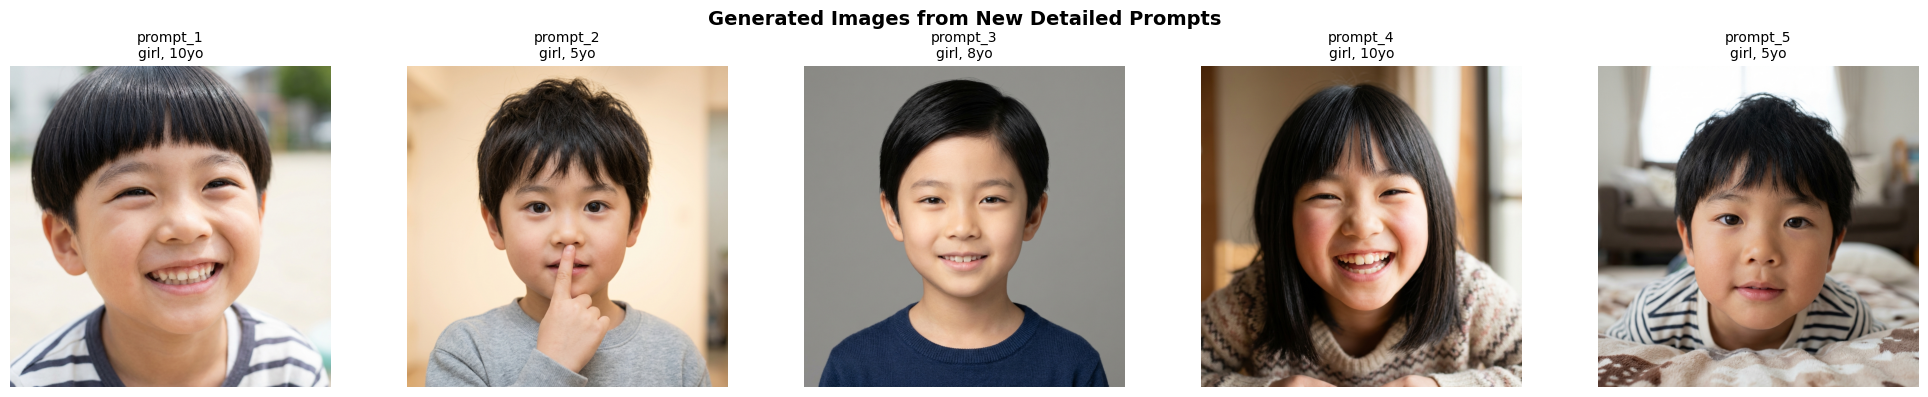

✓ Visualization saved to: new_detailed_prompts_test/new_detailed_prompts_visualization.png


In [12]:
# Visualize the generated images from new detailed prompts
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('Generated Images from New Detailed Prompts', fontsize=14, fontweight='bold')

for i, img_info in enumerate(new_detailed_images):
    img = Image.open(img_info['path'])
    axes[i].imshow(img)
    axes[i].set_title(f"{img_info['name']}\n{img_info['gender']}, {img_info['age']}yo", fontsize=10)
    axes[i].axis('off')

plt.tight_layout()
plt.savefig(new_prompts_test_dir / 'new_detailed_prompts_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"✓ Visualization saved to: {new_prompts_test_dir / 'new_detailed_prompts_visualization.png'}")